In [1]:
options(repr.matrix.max.cols=60, repr.matrix.max.rows=100)
library(tidyverse)
library(ggplot2)
library(ggpmisc)

plotdir <- '/home/kpettie/code/github/plotting'
source(file.path(plotdir,"plotting.R"))

fontdir <- '/cashew/shared_data/fonts'
extrafont::font_import(path=fontdir, prompt=FALSE)
extrafont::choose_font('Arial')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Scanning ttf files in /cashew/shared_data/fonts ...

Extracting .afm files from .ttf files...

/cashew/shared_data/fonts/ArialMT.ttf
 : ArialMT already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /opt/modules/pkgs/R/4.1.0/lib/R/library/extrafontdb/metrics



[1] "Arial"

In [2]:
outdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/noCEU'
ceusuppdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/supp'
suppdir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/manuscript/figs/noCEU/supp'

as_dir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/090422output/diffABC/HiChIP/aggregate'
a_dir <- '/home/kpettie/nf_selection/abc/from_sherlock/abc_1000G/180922outputNoCEU/diffABC/HiChIP/aggregate'

# supp

## ABC with CEU

In [3]:
fes <- read_tsv(
    file.path(
        as_dir, 
        'allZerosFilt.meanQN.16.AFR_EUR.diff.allComponents.DEoverlap.fisherEnrichments.txt'
    )
) 

fes <- fes %>% 
    filter(score_type=='ABC.Score') %>% 
    mutate(score_type = case_when(score_type=='ABC.Score' ~ 'ABC'),
           celltype_condition = paste(celltype, condition),
           self_promoter=if_else(self_promoter, 'promoter','enhancer')) %>%
    dplyr::filter(is.na(self_promoter),
                  !doublecount_enh,
                  datatype %in% c('bulk','pseudobulk')) %>% 
    mutate(celltype_facet = if_else(celltype=='LCL', 'LCLs (Lea et al.)', 'PBMCs (Randolph et al.)'),
           points_label = if_else(celltype=='LCL', condition, celltype),
           padj = pvalue*n())
fes

Rows: 1008 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): condition, celltype, datatype, score_type
dbl (10): de_significance, enrichment, odds_ratio, pvalue, conf_lower, conf_...
lgl  (2): self_promoter, doublecount_enh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


de_significance,enrichment,odds_ratio,pvalue,conf_lower,conf_upper,fg_success,fg_total,bg_success,bg_total,condition,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>
0.05,1.134867,1.362038,3.829614e-02,1.0211002,Inf,94,163,779,1533,ACRYL,LCL,bulk,NA,FALSE,ABC,LCL ACRYL,LCLs (Lea et al.),ACRYL,8.425151e-01
0.05,1.096197,1.311779,9.175303e-03,1.0833858,Inf,245,447,771,1542,BAFF,LCL,bulk,NA,FALSE,ABC,LCL BAFF,LCLs (Lea et al.),BAFF,2.018567e-01
0.05,1.071240,1.179451,1.433828e-01,0.9194970,Inf,118,221,793,1591,BPA,LCL,bulk,NA,FALSE,ABC,LCL BPA,LCLs (Lea et al.),BPA,3.154421e+00
0.05,1.115320,1.402617,1.412117e-03,1.1605726,Inf,265,465,792,1550,DEX,LCL,bulk,NA,FALSE,ABC,LCL DEX,LCLs (Lea et al.),DEX,3.106657e-02
0.05,1.142250,1.542646,4.278694e-05,1.2812663,Inf,295,492,853,1625,ETOH,LCL,bulk,NA,FALSE,ABC,LCL ETOH,LCLs (Lea et al.),ETOH,9.413127e-04
0.05,1.004049,1.009662,5.000000e-01,0.7961091,Inf,124,247,780,1560,FSL1,LCL,bulk,NA,FALSE,ABC,LCL FSL1,LCLs (Lea et al.),FSL1,1.100000e+01
0.05,1.121799,1.400517,2.357392e-03,1.1475100,Inf,228,398,790,1547,GARD,LCL,bulk,NA,FALSE,ABC,LCL GARD,LCLs (Lea et al.),GARD,5.186262e-02
0.05,1.069540,1.219337,4.620477e-02,1.0043409,Inf,235,426,801,1553,H20,LCL,bulk,NA,FALSE,ABC,LCL H20,LCLs (Lea et al.),H20,1.016505e+00
0.05,1.183175,1.732803,6.787750e-07,1.4295612,Inf,282,467,763,1495,IFNG,LCL,bulk,NA,FALSE,ABC,LCL IFNG,LCLs (Lea et al.),IFNG,1.493305e-05


In [4]:
fes %>% 
    arrange(pvalue)

de_significance,enrichment,odds_ratio,pvalue,conf_lower,conf_upper,fg_success,fg_total,bg_success,bg_total,condition,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>
0.05,1.183175,1.732803,6.787750e-07,1.4295612,Inf,282,467,763,1495,IFNG,LCL,bulk,NA,FALSE,ABC,LCL IFNG,LCLs (Lea et al.),IFNG,1.493305e-05
0.05,1.142250,1.542646,4.278694e-05,1.2812663,Inf,295,492,853,1625,ETOH,LCL,bulk,NA,FALSE,ABC,LCL ETOH,LCLs (Lea et al.),ETOH,9.413127e-04
0.05,1.265605,1.955460,4.882276e-04,1.3811353,Inf,83,128,394,769,NI,NK,pseudobulk,NA,FALSE,ABC,NK NI,PBMCs (Randolph et al.),NK,1.074101e-02
0.05,1.115320,1.402617,1.412117e-03,1.1605726,Inf,265,465,792,1550,DEX,LCL,bulk,NA,FALSE,ABC,LCL DEX,LCLs (Lea et al.),DEX,3.106657e-02
0.05,1.205919,1.720618,2.099133e-03,1.2485485,Inf,95,152,397,766,flu,NK,pseudobulk,NA,FALSE,ABC,NK flu,PBMCs (Randolph et al.),NK,4.618092e-02
0.05,1.121799,1.400517,2.357392e-03,1.1475100,Inf,228,398,790,1547,GARD,LCL,bulk,NA,FALSE,ABC,LCL GARD,LCLs (Lea et al.),GARD,5.186262e-02
0.05,1.169573,1.666837,2.890869e-03,1.2202765,Inf,110,184,298,583,flu,B,pseudobulk,NA,FALSE,ABC,B flu,PBMCs (Randolph et al.),B,6.359912e-02
0.05,1.109817,1.356432,4.464975e-03,1.1167783,Inf,237,422,796,1573,TUNIC,LCL,bulk,NA,FALSE,ABC,LCL TUNIC,LCLs (Lea et al.),TUNIC,9.822945e-02
0.05,1.203125,1.701525,5.846847e-03,1.1930625,Inf,77,128,280,560,NI,monocytes,pseudobulk,NA,FALSE,ABC,monocytes NI,PBMCs (Randolph et al.),monocytes,1.286306e-01


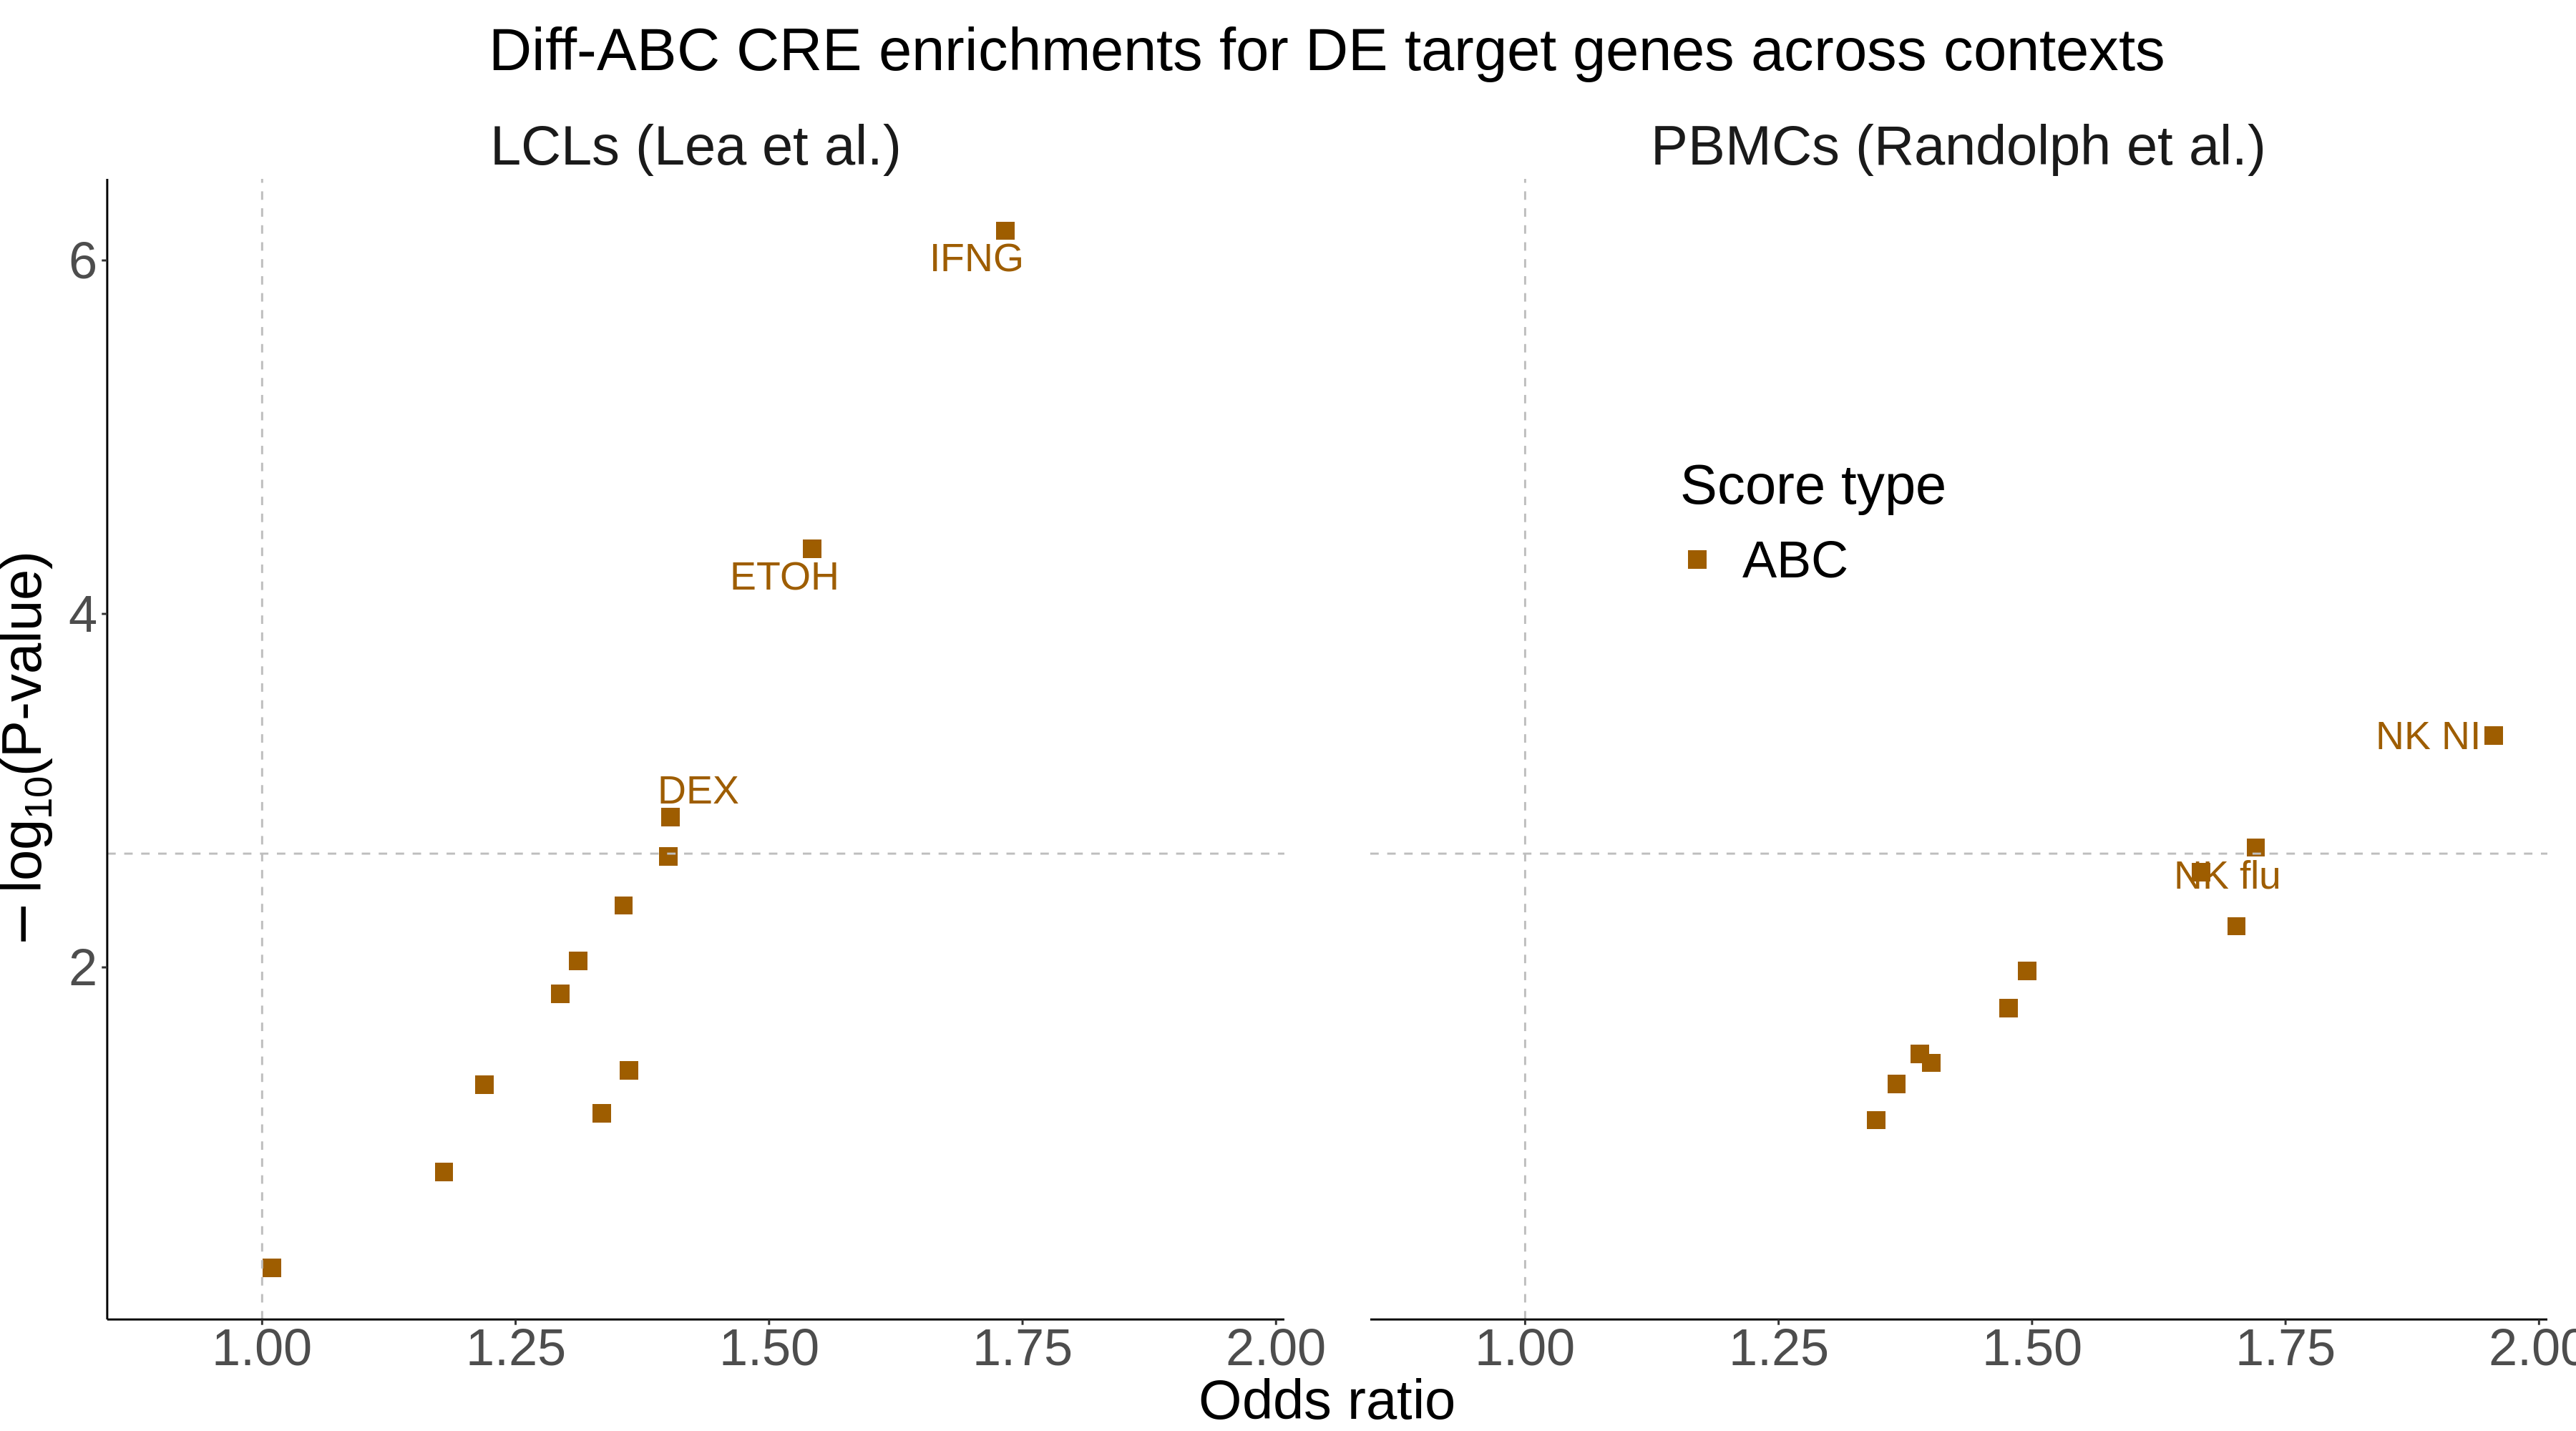

In [42]:
chipcolor <- '#61567D' # purpleish
ataccolor <- '#61AEA6' # tealish
hiccolor <- '#C91089' # magentaish
abccolor <- '#9E5D00' # brownish

stcolors <- c(abccolor, ataccolor, chipcolor, hiccolor)

titlesize <- 28
textsize <- 26

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 200)

ggplot(fes %>% 
           arrange(desc(pvalue)), 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=factor(score_type),shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=fes %>% 
                    mutate(condition = as.character(condition),
                           points_label = if_else(celltype=='LCL', points_label, paste(points_label, condition, sep=' '))) %>% 
                    dplyr::filter(padj<0.05),
                aes(label=points_label, color=factor(score_type)),
                size=7,
                show.legend=FALSE,
                box.padding=.4
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) + 
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(fes)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Score type',
                shape='Score type') + 
            scale_color_manual(values=stcolors) + 
            scale_shape_manual(values=c(15, 16, 17, 8)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
#             geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=5.5) + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.7,.7),
    #               legend.box = 'vertical',
    #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        ggtitle("Diff-ABC CRE enrichments for DE target genes across contexts") +
        theme(plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(1,1,0,0),"line"))

ggsave(
    file.path(
        ceusuppdir, 
        'ABC_DE_with_CEU.png'
    ),
    width=18, 
    height=10
)

# without CEU

In [5]:
fe <- read_tsv(
    file.path(
        a_dir, 
        'allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.DEoverlap.fisherEnrichments.txt'
    )
) 
fer <- read_tsv(
    file.path(
        a_dir, 
        'allZerosFilt.meanQN.14.AFR_EUR.diff.allComponents.DEoverlap.fisherEnrichmentsDirection.txt'
    )
)

fef <- fe %>% 
    dplyr::filter(datatype %in% c('bulk','pseudobulk'),
                  score_type %in% c('atac.Score','chip.Score')) %>% 
    group_by(score_type) %>% 
    arrange(celltype, condition, .by_group=TRUE) %>% 
    ungroup()

fe <- fe %>% 
    mutate(score_type = case_when(score_type=='ABC.Score' ~ 'ABC',
                                  score_type=='atac.Score' ~ 'ATAC',
                                  score_type=='chip.Score' ~ 'ChIP',
                                  score_type=='hic.Score' ~ 'HiC'),
           celltype_condition = paste(celltype, condition),
           self_promoter=if_else(self_promoter, 'promoter','enhancer'))

fer <- fer %>% 
    mutate(score_type = case_when(score_type=='ABC.Score' ~ 'ABC',
                                  score_type=='atac.Score' ~ 'ATAC',
                                  score_type=='chip.Score' ~ 'ChIP',
                                  score_type=='hic.Score' ~ 'HiC'),
           celltype_condition = paste(celltype, condition),
           self_promoter=if_else(self_promoter, 'promoter','enhancer'))

afe <- rbind(
    fe %>% 
        select(-enrichment,-de_significance,-starts_with(c('fg_','bg_'))) %>% 
        mutate(test_type = 'diff'),
    fer %>% 
        select(-starts_with('DE_')) %>% 
        mutate(test_type = 'direction')
)

Rows: 1008 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (4): condition, celltype, datatype, score_type
dbl (10): de_significance, enrichment, odds_ratio, pvalue, conf_lower, conf_...
lgl  (2): self_promoter, doublecount_enh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1008 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (4): condition, celltype, datatype, score_type
dbl (9): de_significance, odds_ratio, pvalue, conf_lower, conf_upper, DE_up_...
lgl (2): self_promoter, doublecount_enh

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
cdtPlotColors <- tribble(
                    ~condition,  ~hex, ~category, ~legendorder, 
                    'GARD',  "#CC79A7", 'Immune stimulant',        4,
                    'FSL1',  "#CC79A7", 'Immune stimulant',        4,
                    'IFNG',  "#CC79A7", 'Immune stimulant',        4,
                    'BAFF',  "#CC79A7", 'Immune stimulant',        4,
                    'DEX',   "#56B4E9", 'Hormone',                 1,
                    'IGF',   "#56B4E9", 'Hormone',                 1,
                    'ACRYL', "#009E73", 'Contaminant or stressor', 2,
                    'PFOA',  "#009E73", 'Contaminant or stressor', 2,
                    'BPA',   "#009E73", 'Contaminant or stressor', 2,
                    'TUNIC', "#009E73", 'Contaminant or stressor', 2,
                    'ETOH',  "#009E73", 'Contaminant or stressor', 2,
                    'H20',   "#000000", 'Vehicle control',         3,
                    'NI',    "#B2B3B3", 'PBMC NI',                 5,
                    'flu',   "#941120", 'PBMC flu',                6 
                )

fep <- fe %>%
    dplyr::filter(is.na(self_promoter),
                  !doublecount_enh,
                  datatype %in% c('bulk','pseudobulk')) %>% 
    mutate(celltype_facet = if_else(celltype=='LCL', 'LCLs (Lea et al.)', 'PBMCs (Randolph et al.)'),
           points_label = if_else(celltype=='LCL', condition, celltype),
           padj = pvalue*n()) %>% 
    merge(.,
          cdtPlotColors) %>% 
    mutate(category = factor(category),
           category = fct_reorder(category, legendorder),
           hex = factor(hex),
           hex = fct_reorder(hex, legendorder),
           condition = factor(condition),
           condition = fct_reorder(condition, legendorder)) %>% 
    arrange(legendorder)
fep
    

condition,de_significance,enrichment,odds_ratio,pvalue,conf_lower,conf_upper,fg_success,fg_total,bg_success,bg_total,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj,hex,category,legendorder
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>
DEX,0.05,1.0610716,1.1644261,1.061360e-01,0.9546372,Inf,194,417,634,1446,LCL,bulk,NA,FALSE,HiC,LCL DEX,LCLs (Lea et al.),DEX,9.339968e+00,#56B4E9,Hormone,1
DEX,0.05,1.0411027,1.3389250,7.615572e-03,1.0953451,Inf,542,674,1422,1841,LCL,bulk,NA,FALSE,ChIP,LCL DEX,LCLs (Lea et al.),DEX,6.701703e-01,#56B4E9,Hormone,1
DEX,0.05,1.0349573,1.5192342,9.895400e-04,1.2082219,Inf,722,809,1929,2237,LCL,bulk,NA,FALSE,ATAC,LCL DEX,LCLs (Lea et al.),DEX,8.707952e-02,#56B4E9,Hormone,1
DEX,0.05,1.0906521,1.3648553,2.697462e-03,1.1322538,Inf,313,496,957,1654,LCL,bulk,NA,FALSE,ABC,LCL DEX,LCLs (Lea et al.),DEX,2.373767e-01,#56B4E9,Hormone,1
IGF,0.05,1.0088751,1.0210781,4.551485e-01,0.8300453,Inf,161,374,617,1446,LCL,bulk,NA,FALSE,HiC,LCL IGF,LCLs (Lea et al.),IGF,4.005307e+01,#56B4E9,Hormone,1
IGF,0.05,1.0588851,1.4315634,1.485708e-03,1.1682392,Inf,467,590,1350,1806,LCL,bulk,NA,FALSE,ChIP,LCL IGF,LCLs (Lea et al.),IGF,1.307423e-01,#56B4E9,Hormone,1
IGF,0.05,1.0435893,1.6408468,2.393603e-04,1.2872592,Inf,632,705,1840,2142,LCL,bulk,NA,FALSE,ATAC,LCL IGF,LCLs (Lea et al.),IGF,2.106371e-02,#56B4E9,Hormone,1
IGF,0.05,1.0402540,1.1307079,1.456214e-01,0.9370395,Inf,260,460,890,1638,LCL,bulk,NA,FALSE,ABC,LCL IGF,LCLs (Lea et al.),IGF,1.281469e+01,#56B4E9,Hormone,1
ACRYL,0.05,0.9883875,0.9712504,6.037615e-01,0.7344280,Inf,94,171,911,1638,LCL,bulk,NA,FALSE,ABC,LCL ACRYL,LCLs (Lea et al.),ACRYL,5.313101e+01,#009E73,Contaminant or stressor,2


## ABC & HiC

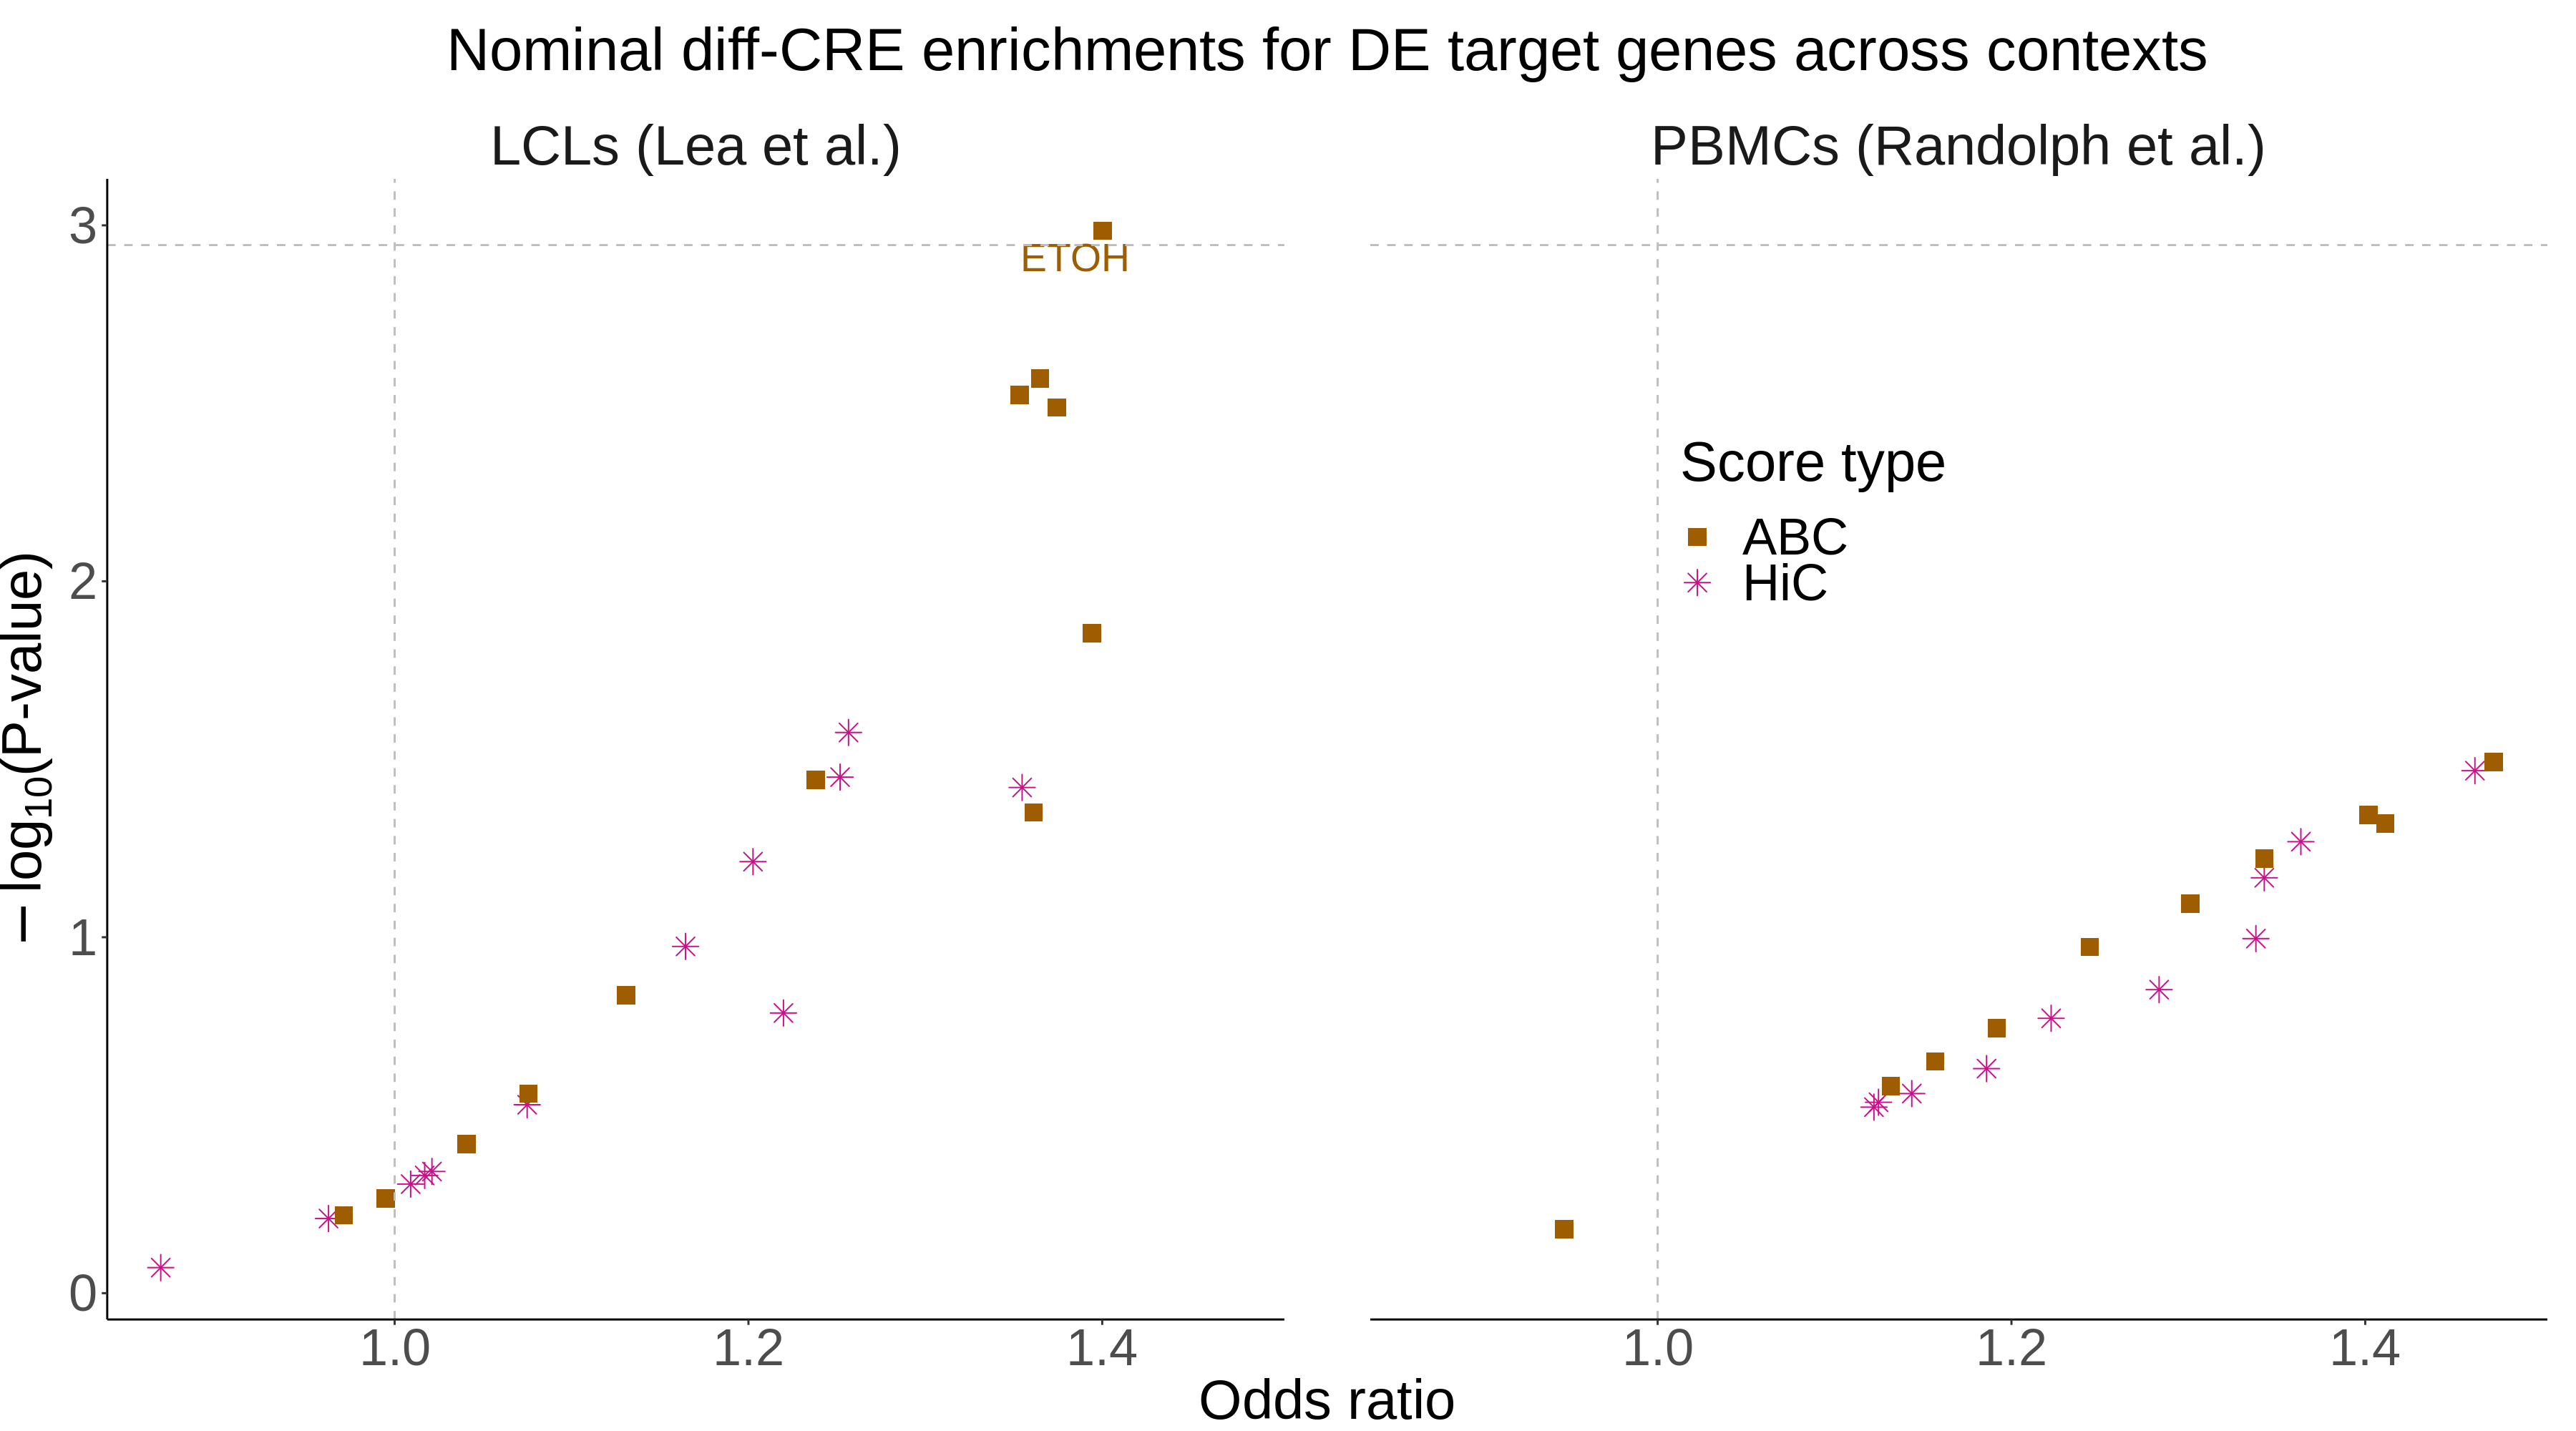

In [57]:
chipcolor <- '#61567D' # purpleish
ataccolor <- '#61AEA6' # tealish
hiccolor <- '#C91089' # magentaish
abccolor <- '#9E5D00' # brownish

stcolors <- c(abccolor, hiccolor)

titlesize <- 28
textsize <- 26

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 200)

cfep <- fep%>% 
           filter(score_type %in% c('ABC','HiC')) %>% 
           arrange(desc(pvalue)) %>% 
    mutate(padj = pvalue*n())

ggplot(cfep, 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=factor(score_type),shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=cfep %>% 
                    mutate(condition = as.character(condition),
                           points_label = if_else(celltype=='LCL', points_label, paste(points_label, condition, sep=' '))) %>% 
                    dplyr::filter(padj<0.05),
                aes(label=points_label, color=factor(score_type)),
                size=7,
                show.legend=FALSE,
                box.padding=.4
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) + 
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(cfep)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Score type',
                shape='Score type') + 
            scale_color_manual(values=stcolors) + 
            scale_shape_manual(values=c(15, 8)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
#             geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=5.5) + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.7,.7),
    #               legend.box = 'vertical',
    #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        ggtitle("Nominal diff-CRE enrichments for DE target genes across contexts") +
        theme(plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(1,1,0,0),"line"))

ggsave(
    file.path(
        suppdir, 
        'ABC_HiC_DE.png'
    ),
    width=18, 
    height=10
)

# b v1

In [27]:
fep %>% 
    arrange(pvalue)

condition,de_significance,enrichment,odds_ratio,pvalue,conf_lower,conf_upper,fg_success,fg_total,bg_success,bg_total,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj,hex,category,legendorder
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>
BAFF,0.05,1.0970568,1.9444974,6.078478e-08,1.5643415,Inf,502,599,1372,1796,LCL,bulk,NA,FALSE,ChIP,LCL BAFF,LCLs (Lea et al.),BAFF,5.349061e-06,#CC79A7,Immune stimulant,4
ETOH,0.05,1.0493994,1.9374319,2.497012e-06,1.5056966,Inf,717,783,1911,2190,LCL,bulk,NA,FALSE,ATAC,LCL ETOH,LCLs (Lea et al.),ETOH,2.197371e-04,#009E73,Contaminant or stressor,2
IFNG,0.05,1.0727037,1.6907307,7.253244e-06,1.3752835,Inf,553,671,1376,1791,LCL,bulk,NA,FALSE,ChIP,LCL IFNG,LCLs (Lea et al.),IFNG,6.382854e-04,#CC79A7,Immune stimulant,4
IGF,0.05,1.0435893,1.6408468,2.393603e-04,1.2872592,Inf,632,705,1840,2142,LCL,bulk,NA,FALSE,ATAC,LCL IGF,LCLs (Lea et al.),IGF,2.106371e-02,#56B4E9,Hormone,1
IFNG,0.05,1.0365590,1.5729935,5.037485e-04,1.2446314,Inf,721,804,1886,2180,LCL,bulk,NA,FALSE,ATAC,LCL IFNG,LCLs (Lea et al.),IFNG,4.432987e-02,#CC79A7,Immune stimulant,4
ETOH,0.05,1.0561407,1.4709839,5.144990e-04,1.2064656,Inf,551,685,1409,1850,LCL,bulk,NA,FALSE,ChIP,LCL ETOH,LCLs (Lea et al.),ETOH,4.527591e-02,#009E73,Contaminant or stressor,2
BAFF,0.05,1.0384710,1.5855700,5.711884e-04,1.2454742,Inf,664,739,1881,2174,LCL,bulk,NA,FALSE,ATAC,LCL BAFF,LCLs (Lea et al.),BAFF,5.026458e-02,#CC79A7,Immune stimulant,4
TUNIC,0.05,1.0586535,1.4714508,8.325904e-04,1.1958545,Inf,488,603,1402,1834,LCL,bulk,NA,FALSE,ChIP,LCL TUNIC,LCLs (Lea et al.),TUNIC,7.326795e-02,#009E73,Contaminant or stressor,2
GARD,0.05,1.0588772,1.4841387,9.018272e-04,1.1984492,Inf,470,576,1384,1796,LCL,bulk,NA,FALSE,ChIP,LCL GARD,LCLs (Lea et al.),GARD,7.936079e-02,#CC79A7,Immune stimulant,4


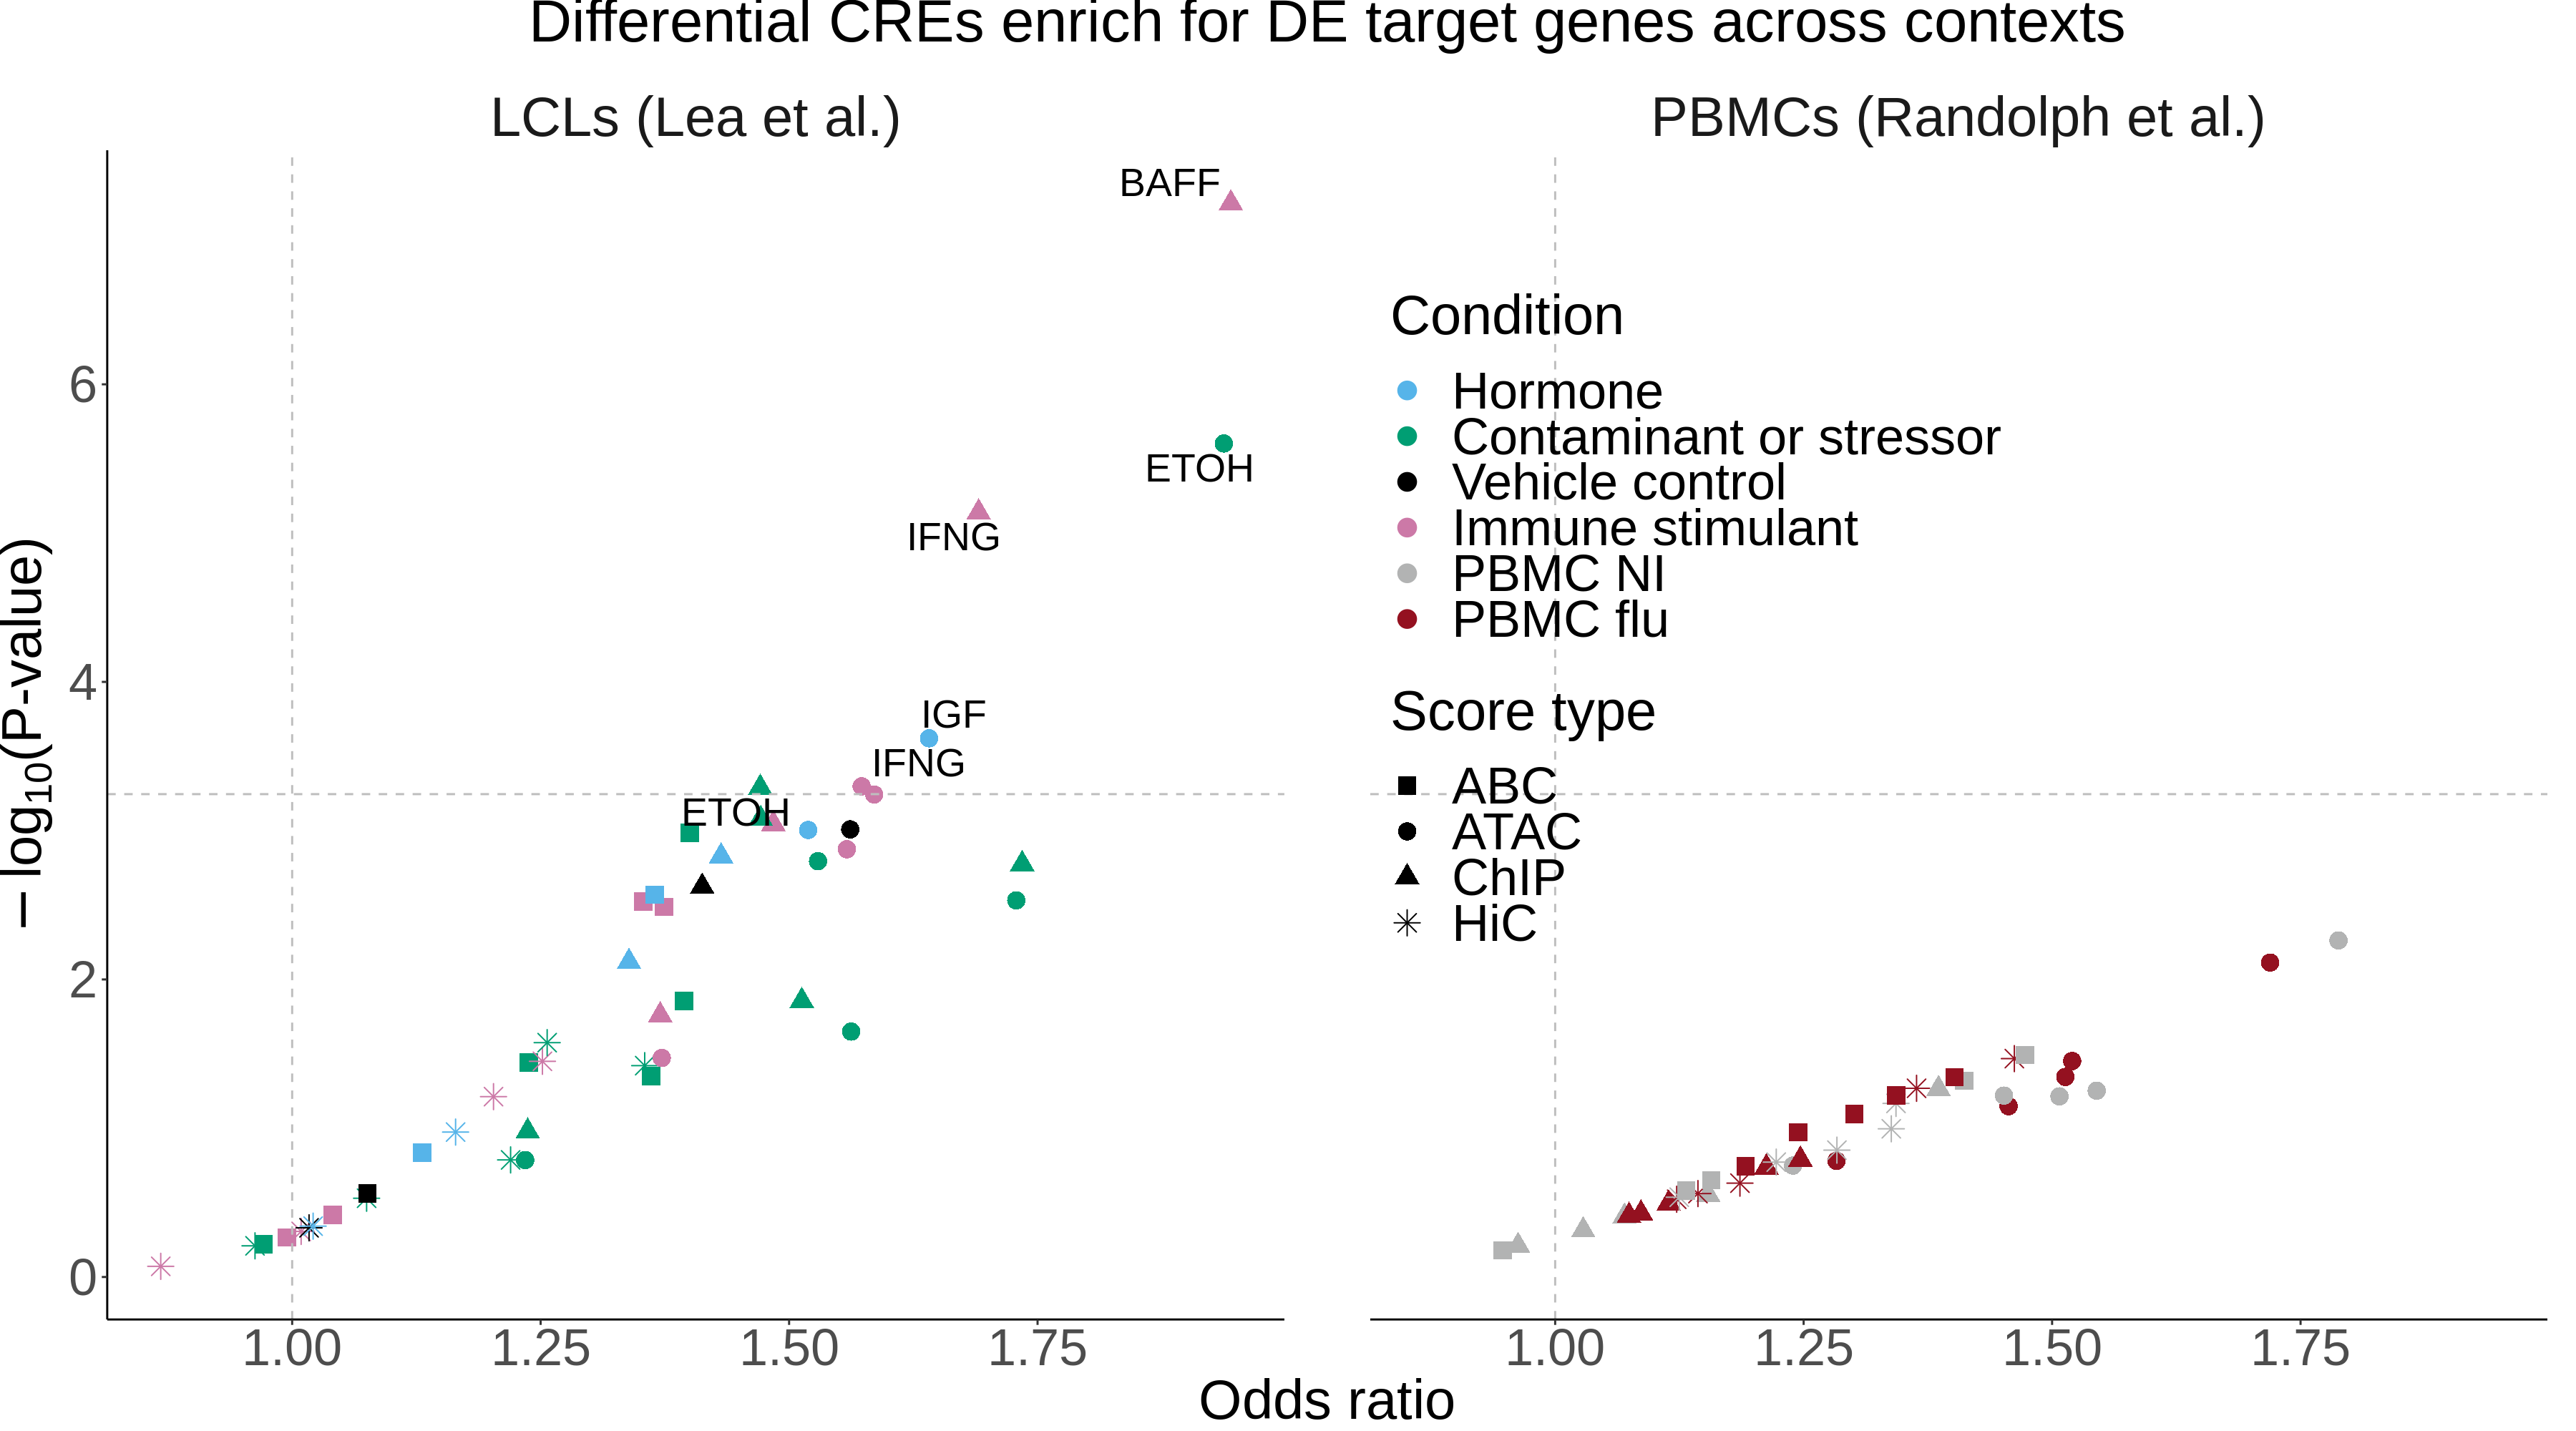

In [5]:
dim1 <- c(12,7)
dim2 <- c(12,7)
combdims <- c(dim1[1] + dim2[1], dim1[2] + dim2[2])
titlesize <- 28
textsize <- 26

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 200)

ggplot(fep %>% 
           arrange(desc(pvalue)), 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=hex,shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=fep %>% dplyr::filter(padj<0.05),
                aes(label=points_label, color='black'),
                size=7,
                show.legend=FALSE,
                box.padding=.3
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) +
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(fep)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Condition',
                shape='Score type') + 
            scale_color_identity(breaks=fep$hex, labels=fep$category, guide='legend') + 
            scale_shape_manual(values=c(15, 16, 17, 8)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.65,.6),
    #               legend.box = 'vertical',
    #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        ggtitle("Differential CREs enrich for DE target genes across contexts") +
        theme(plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(0,1,0,0),"line"))

ggsave(
    file.path(
        outdir, 
        'Fig2b.png'
    ),
    width=18, 
    height=10
)

In [7]:
ferp <- fer %>%
    dplyr::filter(is.na(self_promoter),
                  !doublecount_enh,
                  datatype %in% c('bulk','pseudobulk')) %>% 
    mutate(celltype_facet = if_else(celltype=='LCL', 'LCLs (Lea et al.)', 'PBMCs (Randolph et al.)'),
           points_label = if_else(celltype=='LCL', condition, celltype),
           padj = pvalue*n()) %>% 
    merge(.,
          cdtPlotColors) %>% 
    mutate(category = factor(category),
           category = fct_reorder(category, legendorder),
           hex = factor(hex),
           hex = fct_reorder(hex, legendorder),
           condition = factor(condition),
           condition = fct_reorder(condition, legendorder)) %>% 
    arrange(legendorder)
ferp

condition,de_significance,odds_ratio,pvalue,conf_lower,conf_upper,DE_up_DA_up,DE_up_DA_down,DE_down_DA_up,DE_down_DA_down,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj,hex,category,legendorder
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>
DEX,0.05,0.7337195,8.893300e-01,0.4381812,Inf,44,53,51,45,LCL,bulk,NA,FALSE,HiC,LCL DEX,LCLs (Lea et al.),DEX,7.826104e+01,#56B4E9,Hormone,1
DEX,0.05,2.9017112,1.870560e-09,2.1221124,Inf,155,88,106,175,LCL,bulk,NA,FALSE,ChIP,LCL DEX,LCLs (Lea et al.),DEX,1.646092e-07,#56B4E9,Hormone,1
DEX,0.05,1.7123839,3.212669e-04,1.3124421,Inf,161,166,133,235,LCL,bulk,NA,FALSE,ATAC,LCL DEX,LCLs (Lea et al.),DEX,2.827148e-02,#56B4E9,Hormone,1
DEX,0.05,1.8553932,5.565529e-03,1.2302552,Inf,70,76,54,109,LCL,bulk,NA,FALSE,ABC,LCL DEX,LCLs (Lea et al.),DEX,4.897665e-01,#56B4E9,Hormone,1
IGF,0.05,1.1419181,3.947609e-01,0.6503373,Inf,40,44,35,44,LCL,bulk,NA,FALSE,HiC,LCL IGF,LCLs (Lea et al.),IGF,3.473896e+01,#56B4E9,Hormone,1
IGF,0.05,2.9287278,1.368496e-08,2.0945861,Inf,134,80,89,156,LCL,bulk,NA,FALSE,ChIP,LCL IGF,LCLs (Lea et al.),IGF,1.204276e-06,#56B4E9,Hormone,1
IGF,0.05,1.9277226,4.282044e-05,1.4516351,Inf,149,134,121,210,LCL,bulk,NA,FALSE,ATAC,LCL IGF,LCLs (Lea et al.),IGF,3.768199e-03,#56B4E9,Hormone,1
IGF,0.05,1.9013176,9.058550e-03,1.2020827,Inf,58,71,39,91,LCL,bulk,NA,FALSE,ABC,LCL IGF,LCLs (Lea et al.),IGF,7.971524e-01,#56B4E9,Hormone,1
ACRYL,0.05,2.4745309,2.948441e-02,1.1097362,Inf,19,16,19,40,LCL,bulk,NA,FALSE,ABC,LCL ACRYL,LCLs (Lea et al.),ACRYL,2.594628e+00,#009E73,Contaminant or stressor,2


# d v1

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


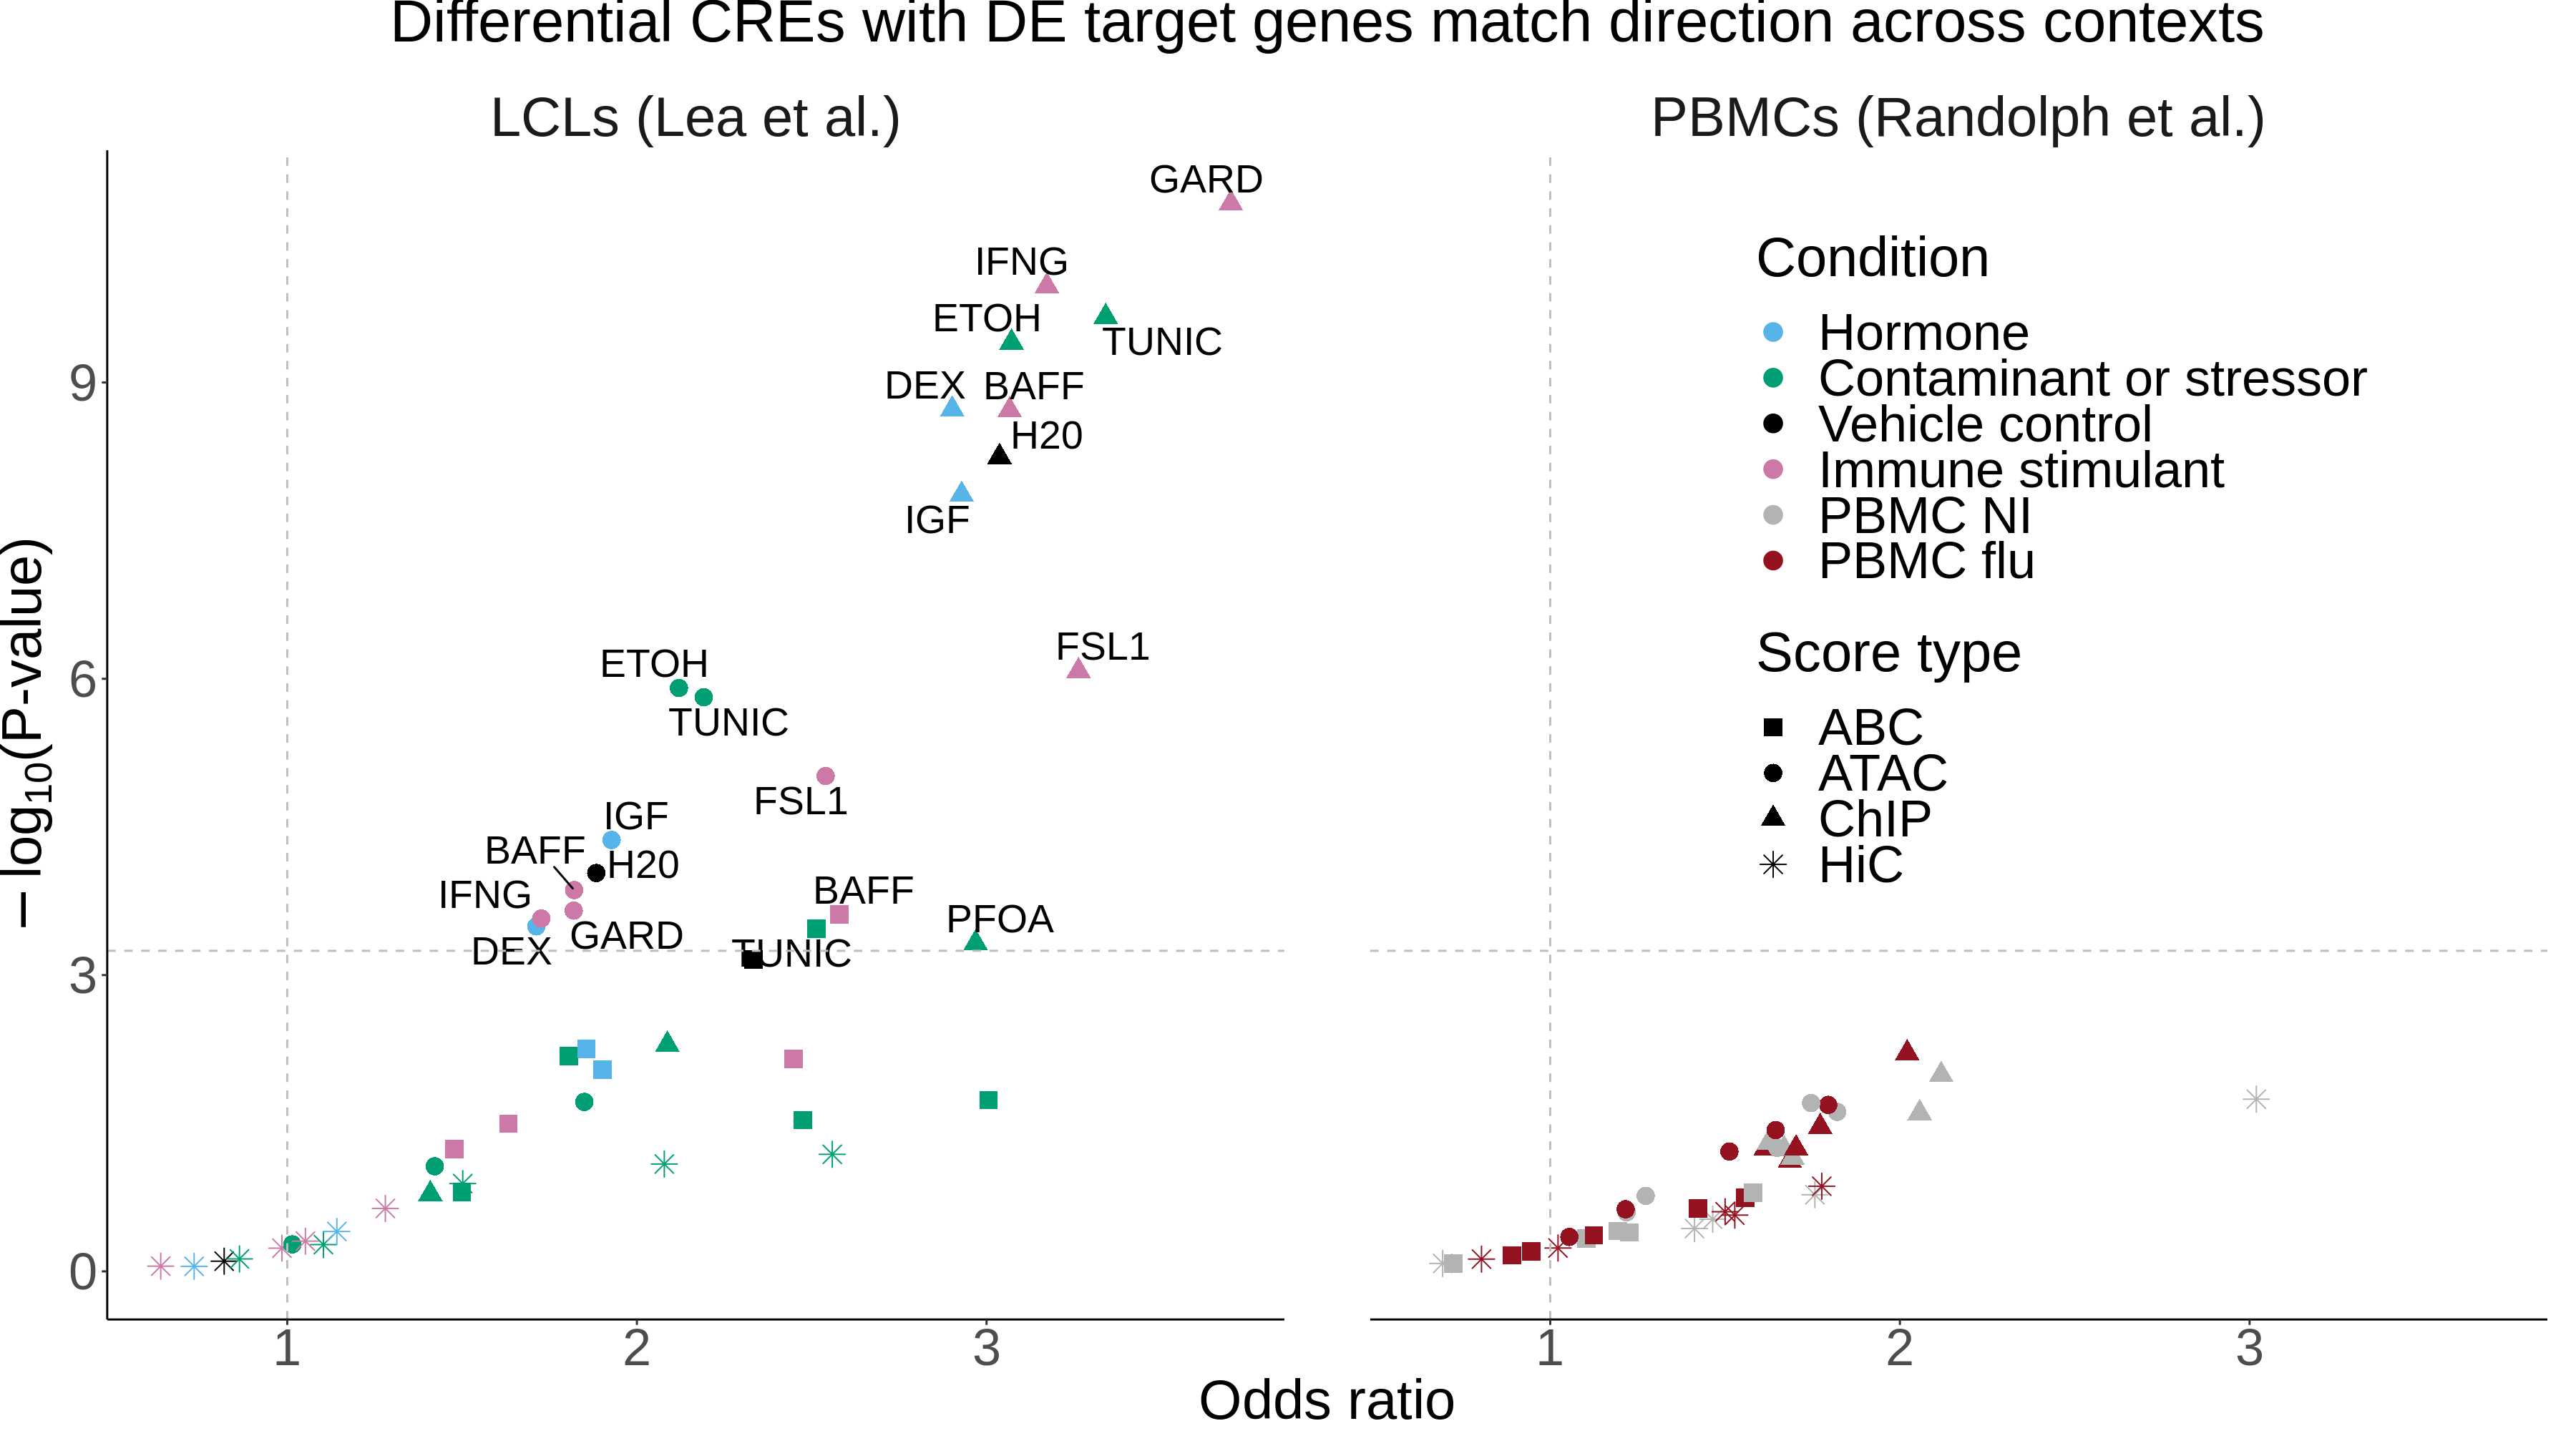

In [7]:
dim1 <- c(12,7)
dim2 <- c(12,7)
combdims <- c(dim1[1] + dim2[1], dim1[2] + dim2[2])
titlesize <- 28
textsize <- 26

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 200)

ggplot(ferp %>% 
           arrange(desc(pvalue)), 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=hex,shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=ferp %>% dplyr::filter(padj<0.05),
                aes(label=points_label, color='black'),
                size=7,
                show.legend=FALSE,
                box.padding=.3
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) +
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(ferp)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Condition',
                shape='Score type') + 
            scale_color_identity(breaks=ferp$hex, labels=ferp$category, guide='legend') + 
            scale_shape_manual(values=c(15, 16, 17, 8)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.8,.65),
    #               legend.box = 'vertical',
    #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        ggtitle("Differential CREs with DE target genes match direction across contexts") +
        theme(plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(0,1,0,0),"line")) 

ggsave(
    file.path(
        outdir, 
        'Fig2d.png'
    ),
    width=18, 
    height=10
)

In [8]:
fep

condition,de_significance,enrichment,odds_ratio,pvalue,conf_lower,conf_upper,fg_success,fg_total,bg_success,bg_total,celltype,datatype,self_promoter,doublecount_enh,score_type,celltype_condition,celltype_facet,points_label,padj,hex,category,legendorder
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>,<dbl>
DEX,0.05,1.0610716,1.1644261,1.061360e-01,0.9546372,Inf,194,417,634,1446,LCL,bulk,NA,FALSE,HiC,LCL DEX,LCLs (Lea et al.),DEX,9.339968e+00,#56B4E9,Hormone,1
DEX,0.05,1.0411027,1.3389250,7.615572e-03,1.0953451,Inf,542,674,1422,1841,LCL,bulk,NA,FALSE,ChIP,LCL DEX,LCLs (Lea et al.),DEX,6.701703e-01,#56B4E9,Hormone,1
DEX,0.05,1.0349573,1.5192342,9.895400e-04,1.2082219,Inf,722,809,1929,2237,LCL,bulk,NA,FALSE,ATAC,LCL DEX,LCLs (Lea et al.),DEX,8.707952e-02,#56B4E9,Hormone,1
DEX,0.05,1.0906521,1.3648553,2.697462e-03,1.1322538,Inf,313,496,957,1654,LCL,bulk,NA,FALSE,ABC,LCL DEX,LCLs (Lea et al.),DEX,2.373767e-01,#56B4E9,Hormone,1
IGF,0.05,1.0088751,1.0210781,4.551485e-01,0.8300453,Inf,161,374,617,1446,LCL,bulk,NA,FALSE,HiC,LCL IGF,LCLs (Lea et al.),IGF,4.005307e+01,#56B4E9,Hormone,1
IGF,0.05,1.0588851,1.4315634,1.485708e-03,1.1682392,Inf,467,590,1350,1806,LCL,bulk,NA,FALSE,ChIP,LCL IGF,LCLs (Lea et al.),IGF,1.307423e-01,#56B4E9,Hormone,1
IGF,0.05,1.0435893,1.6408468,2.393603e-04,1.2872592,Inf,632,705,1840,2142,LCL,bulk,NA,FALSE,ATAC,LCL IGF,LCLs (Lea et al.),IGF,2.106371e-02,#56B4E9,Hormone,1
IGF,0.05,1.0402540,1.1307079,1.456214e-01,0.9370395,Inf,260,460,890,1638,LCL,bulk,NA,FALSE,ABC,LCL IGF,LCLs (Lea et al.),IGF,1.281469e+01,#56B4E9,Hormone,1
ACRYL,0.05,0.9883875,0.9712504,6.037615e-01,0.7344280,Inf,94,171,911,1638,LCL,bulk,NA,FALSE,ABC,LCL ACRYL,LCLs (Lea et al.),ACRYL,5.313101e+01,#009E73,Contaminant or stressor,2


# b

Warning message:
“ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


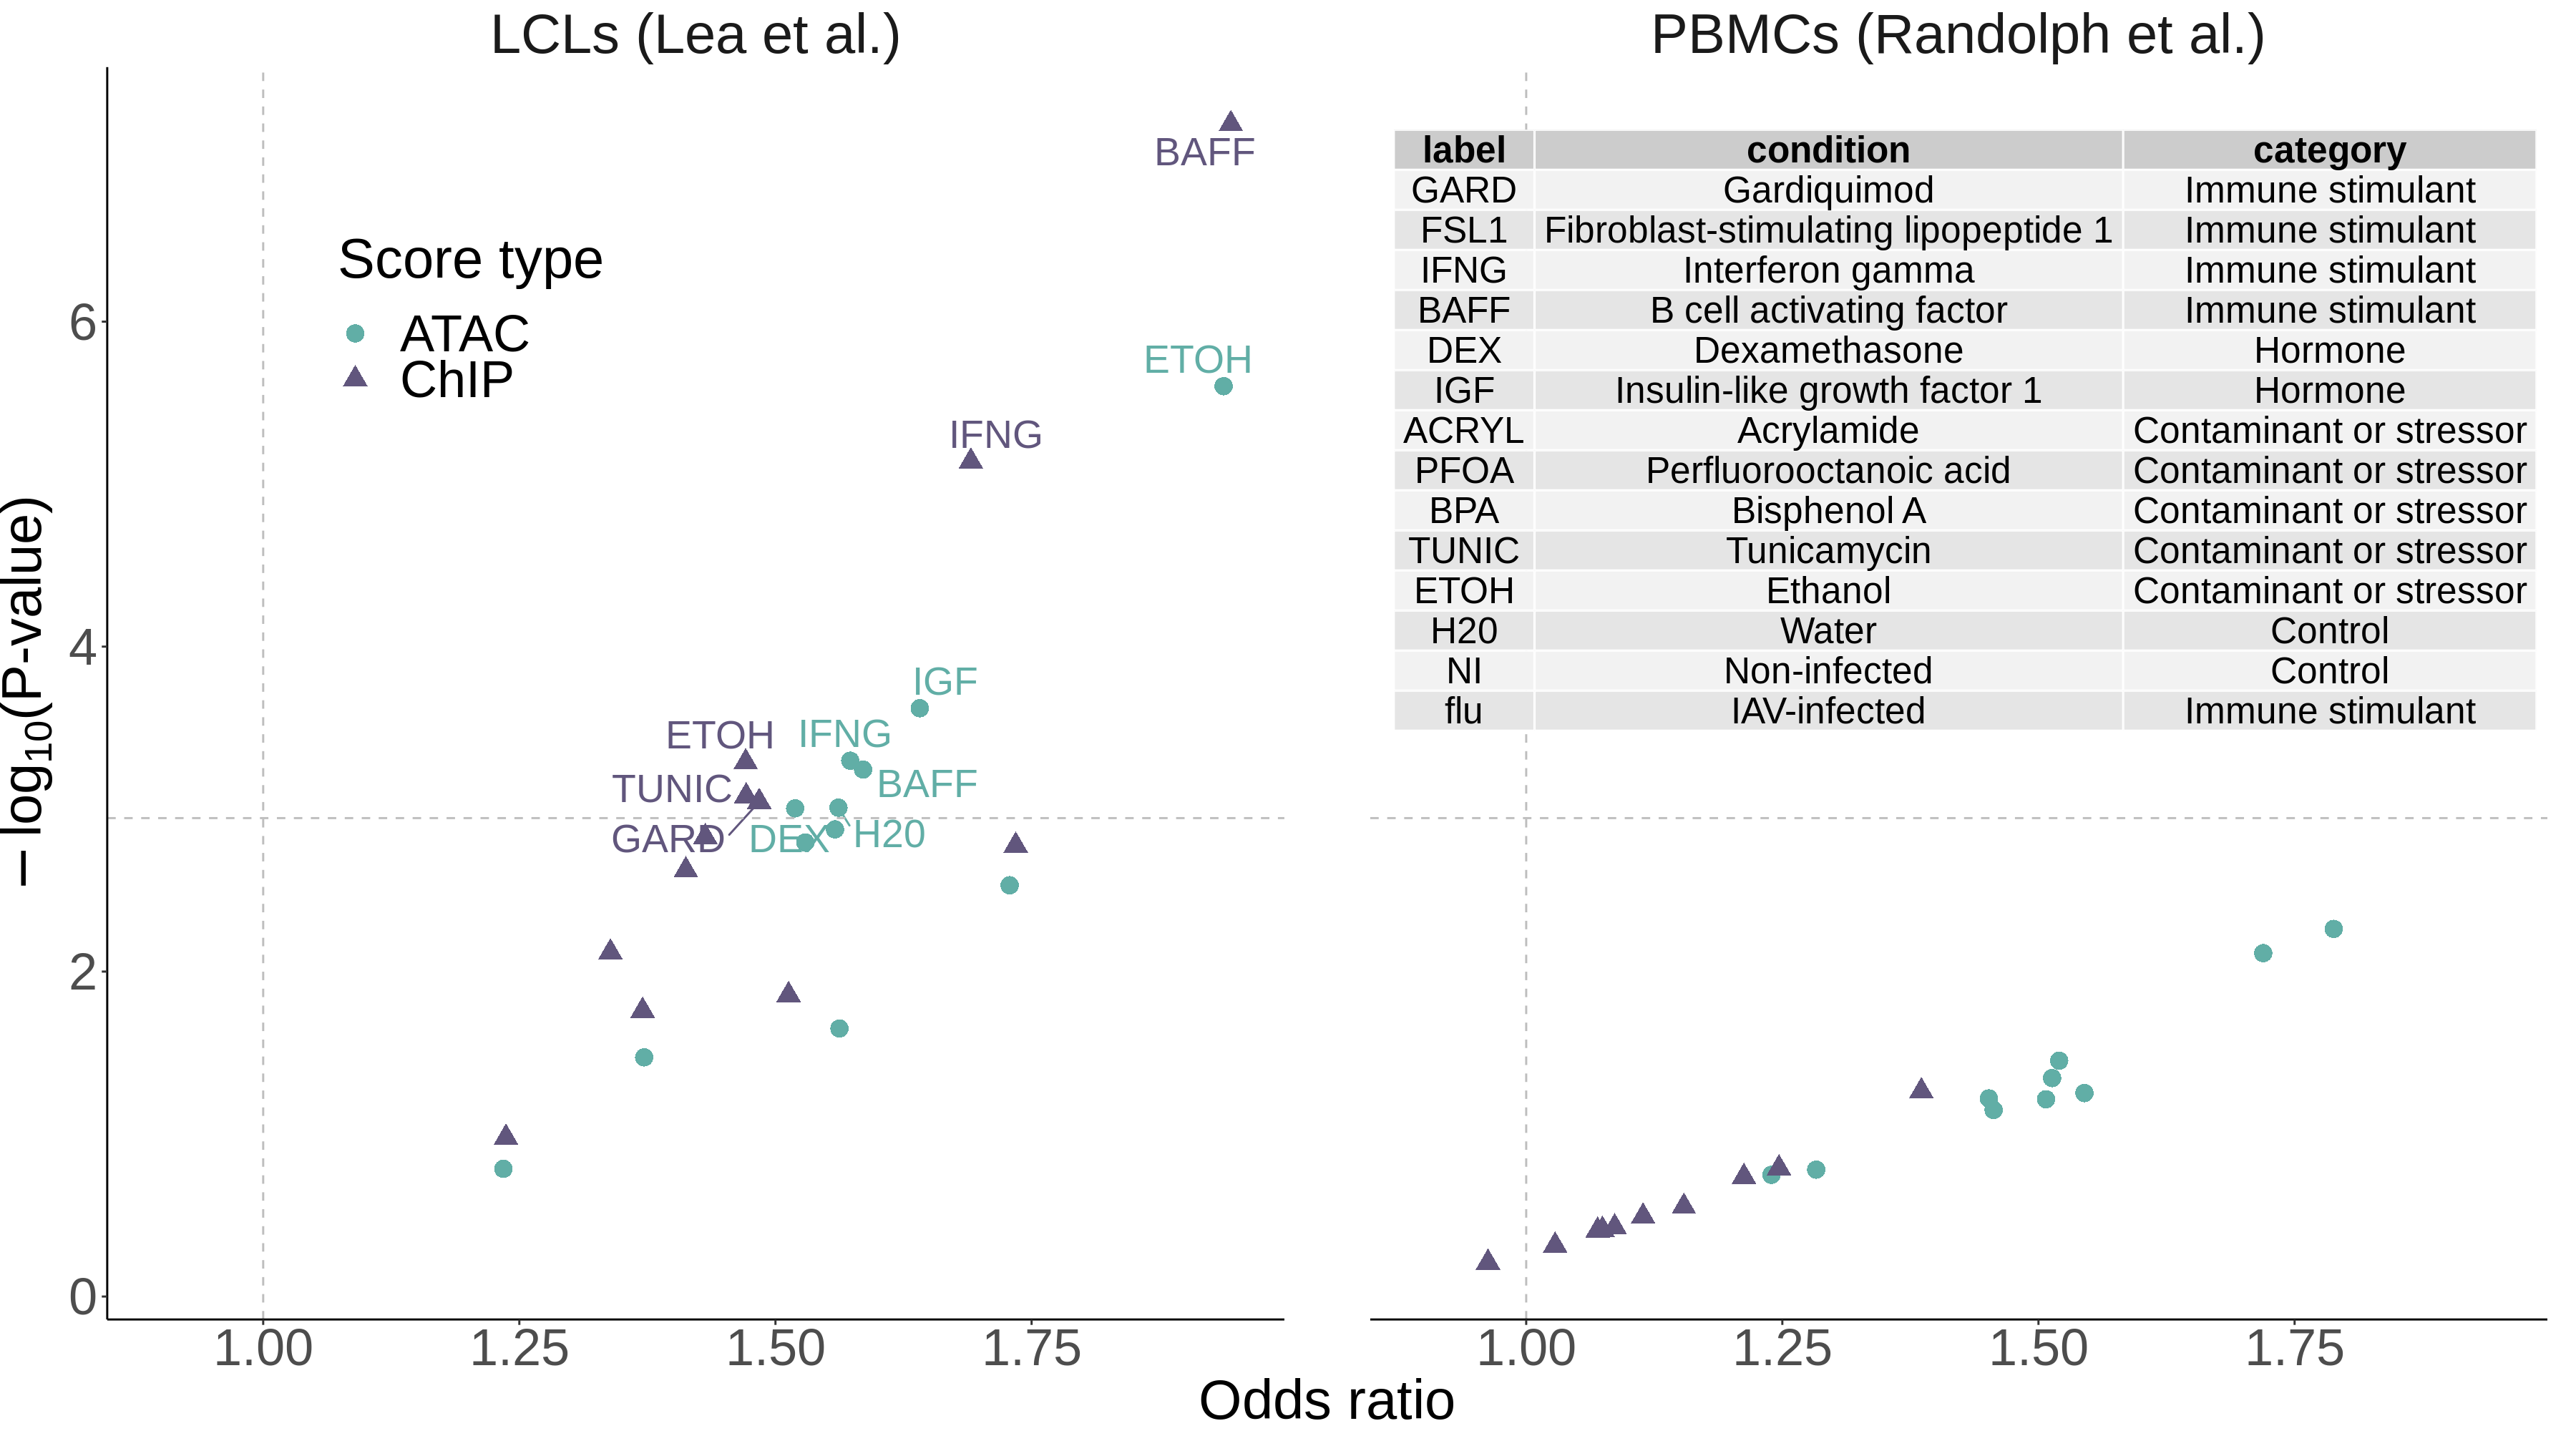

In [11]:
chipcolor <- '#61567D' # purpleish
ataccolor <- '#61AEA6' # tealish
hiccolor <- '#C91089' # magentaish
abccolor <- '#9E5D00' # brownish

stcolors <- c(ataccolor,chipcolor)

cdt_table <- tribble(
                    ~label,  ~condition, ~category, 
                    'GARD',  "Gardiquimod", 'Immune stimulant',        
                    'FSL1',  "Fibroblast-stimulating lipopeptide 1", 'Immune stimulant',        
                    'IFNG',  "Interferon gamma", 'Immune stimulant',        
                    'BAFF',  "B cell activating factor", 'Immune stimulant',        
                    'DEX',   "Dexamethasone", 'Hormone',                 
                    'IGF',   "Insulin-like growth factor 1", 'Hormone',                 
                    'ACRYL', "Acrylamide", 'Contaminant or stressor', 
                    'PFOA',  "Perfluorooctanoic acid", 'Contaminant or stressor', 
                    'BPA',   "Bisphenol A", 'Contaminant or stressor', 
                    'TUNIC', "Tunicamycin", 'Contaminant or stressor', 
                    'ETOH',  "Ethanol", 'Contaminant or stressor', 
                    'H20',   "Water", 'Control',         
                    'NI',    "Non-infected", 'Control',                 
                    'flu',   "IAV-infected", 'Immune stimulant'                
                ) %>% 
    mutate(celltype_facet = 'PBMCs (Randolph et al.)')

tbs <- lapply(split(cdt_table, cdt_table$celltype_facet), "[", -4)

cdt_legend <- tibble(x=0.02,
                     y=.95,
                     celltype_facet = levels(as.factor(cdt_table$celltype_facet)),
                     tb=tbs)

titlesize <- 28
textsize <- 26

options(repr.plot.width = 18, repr.plot.height = 10, repr.plot.res = 200)

cfep <- fep %>% 
           filter(score_type %in% c('ATAC','ChIP')) %>% 
           arrange(desc(pvalue)) %>% 
    mutate(padj=pvalue*n())

ggplot(cfep, 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=factor(score_type),shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=cfep %>% 
                    mutate(condition = as.character(condition),
                           points_label = if_else(celltype=='LCL', points_label, paste(points_label, condition, sep=' '))) %>% 
                    dplyr::filter(padj<0.05),
                aes(label=points_label, color=factor(score_type)),
                size=7,
                show.legend=FALSE,
                box.padding=.4
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) + 
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(cfep)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
            geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=6.5) + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Score type',
                shape='Score type') + 
            scale_color_manual(values=stcolors) + 
            scale_shape_manual(values=c(16, 17)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
#             geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=5.5) + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.15,.8),
    #               legend.box = 'vertical',
    #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
#         ggtitle("Diff-activity CREs enrich for DE target genes across contexts") +
        theme(
#             plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(0,1,0,0),"line"))

# ggsave(
#     file.path(
#         outdir, 
#         'Fig2b.png'
#     ),
#     width=18, 
#     height=10
# )

# d

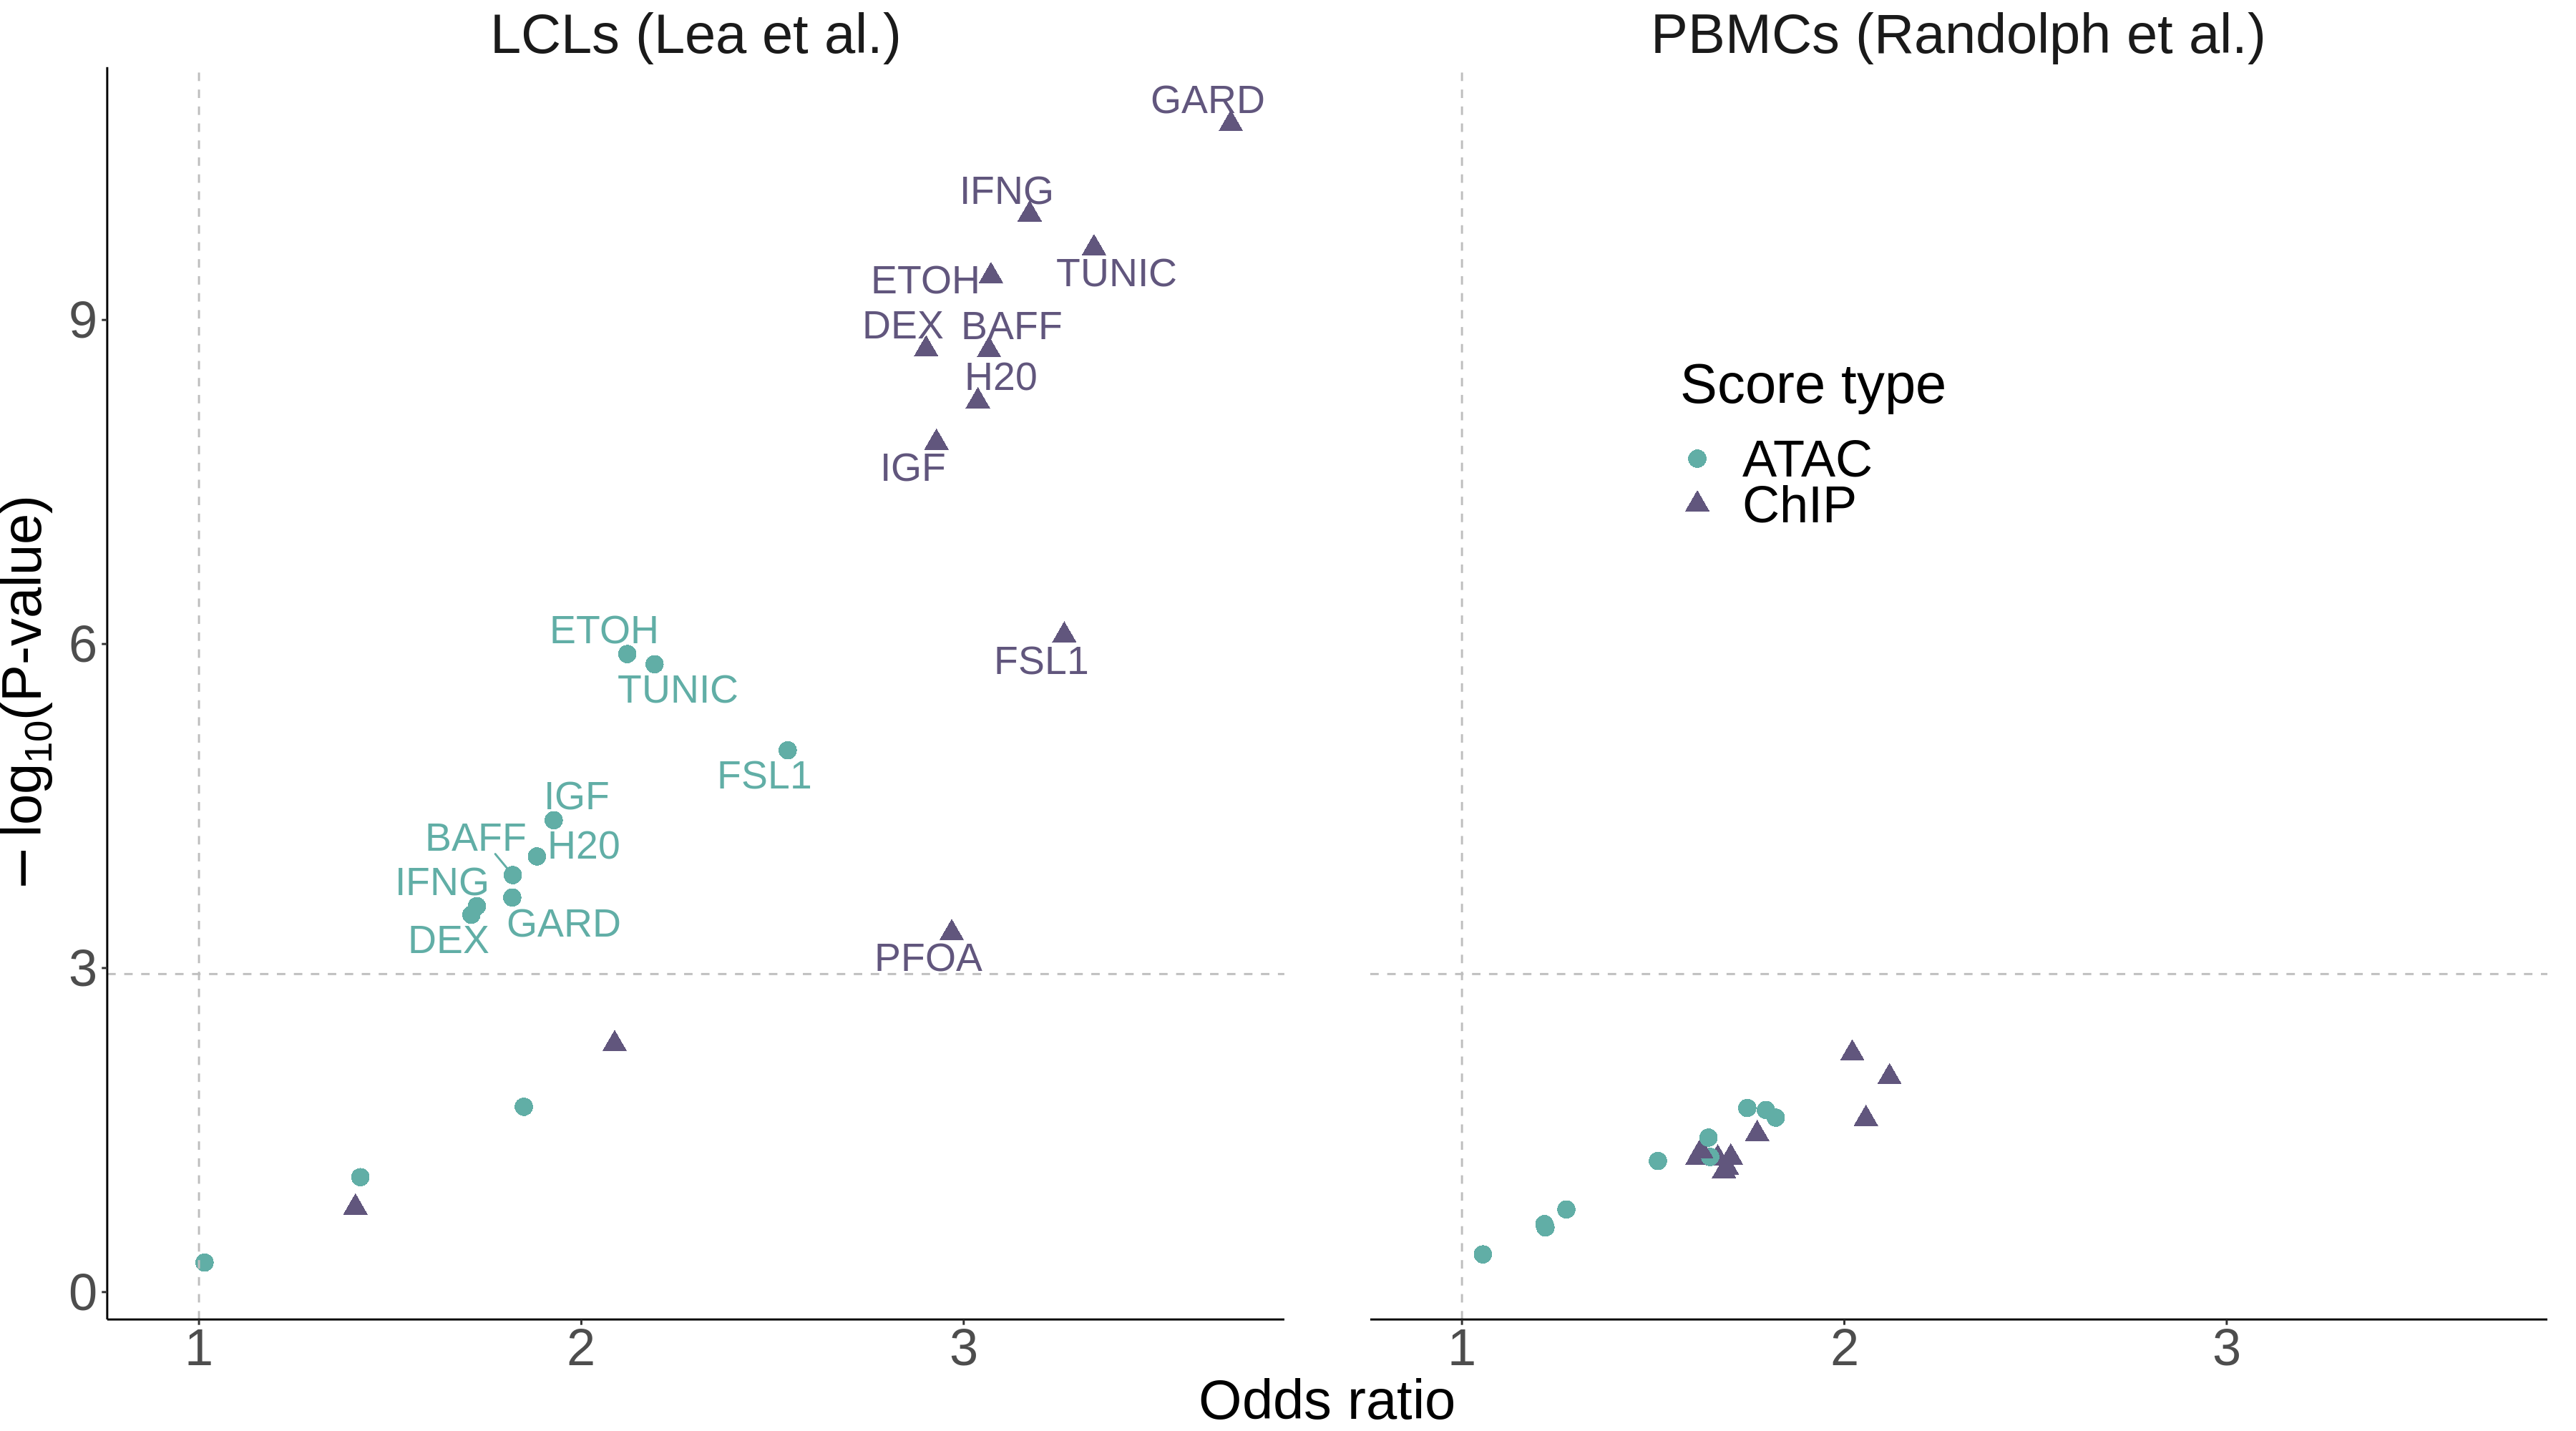

In [12]:
stcolors <- c(ataccolor, chipcolor)

cdt_table <- tribble(
                    ~label,  ~condition, ~category, 
                    'GARD',  "Gardiquimod", 'Immune stimulant',        
                    'FSL1',  "Fibroblast-stimulating lipopeptide 1", 'Immune stimulant',        
                    'IFNG',  "Interferon gamma", 'Immune stimulant',        
                    'BAFF',  "B cell activating factor", 'Immune stimulant',        
                    'DEX',   "Dexamethasone", 'Hormone',                 
                    'IGF',   "Insulin-like growth factor 1", 'Hormone',                 
                    'ACRYL', "Acrylamide", 'Contaminant or stressor', 
                    'PFOA',  "Perfluorooctanoic acid", 'Contaminant or stressor', 
                    'BPA',   "Bisphenol A", 'Contaminant or stressor', 
                    'TUNIC', "Tunicamycin", 'Contaminant or stressor', 
                    'ETOH',  "Ethanol", 'Contaminant or stressor', 
                    'H20',   "Water", 'Control',         
                    'NI',    "Non-infected", 'Control',                 
                    'flu',   "IAV-infected", 'Immune stimulant'                
                ) %>% 
    mutate(celltype_facet = 'PBMCs (Randolph et al.)')

tbs <- lapply(split(cdt_table, cdt_table$celltype_facet), "[", -4)

cdt_legend <- tibble(x=0,
                     y=.9,
                     celltype_facet = levels(as.factor(cdt_table$celltype_facet)),
                     tb=tbs)

cferp <- ferp %>% 
           filter(score_type %in% c('ATAC','ChIP')) %>% 
           arrange(desc(pvalue)) %>% 
    mutate(padj = pvalue*n())

ggplot(cferp, 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=factor(score_type),shape=factor(score_type)), size=4) +
            guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=cferp %>% 
                    mutate(condition = as.character(condition),
                           points_label = if_else(celltype=='LCL', points_label, paste(points_label, condition, sep=' '))) %>% 
                    dplyr::filter(padj<0.05),
                aes(label=points_label, color=factor(score_type)),
                size=7,
                show.legend=FALSE,
                box.padding=.3
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) + 
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(cferp)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
#             geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=6.5) + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
                color='Score type',
                shape='Score type'
                ) + 
            scale_color_manual(values=stcolors) + 
            scale_shape_manual(values=c(16, 17)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
                  legend.text = element_text(size=textsize),
                  legend.title = element_text(size=titlesize),
                  legend.position = c(.7,.7),
#     #               legend.box = 'vertical',
#     #               legend.spacing = unit(0.1, 'cm'),
                  legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        theme(plot.margin = unit(c(0,1,0,0),"line"))

# ggsave(
#     file.path(
#         outdir, 
#         'Fig2d.png'
#     ),
#     width=18, 
#     height=10
# )

In [77]:
cferp %>% 
    filter(padj<0.05) %>% 
    select(DE_up_DA_up,DE_down_DA_down,DE_up_DA_down,DE_down_DA_up) %>% 
    colSums()

DE_up_DA_up DE_down_DA_down   DE_up_DA_down   DE_down_DA_up 
           2664            3309            1992            1875

In [78]:
(1992+1875)/(1992+1875+2664+3309)

[1] 0.3929878

# ABC & HiC direction

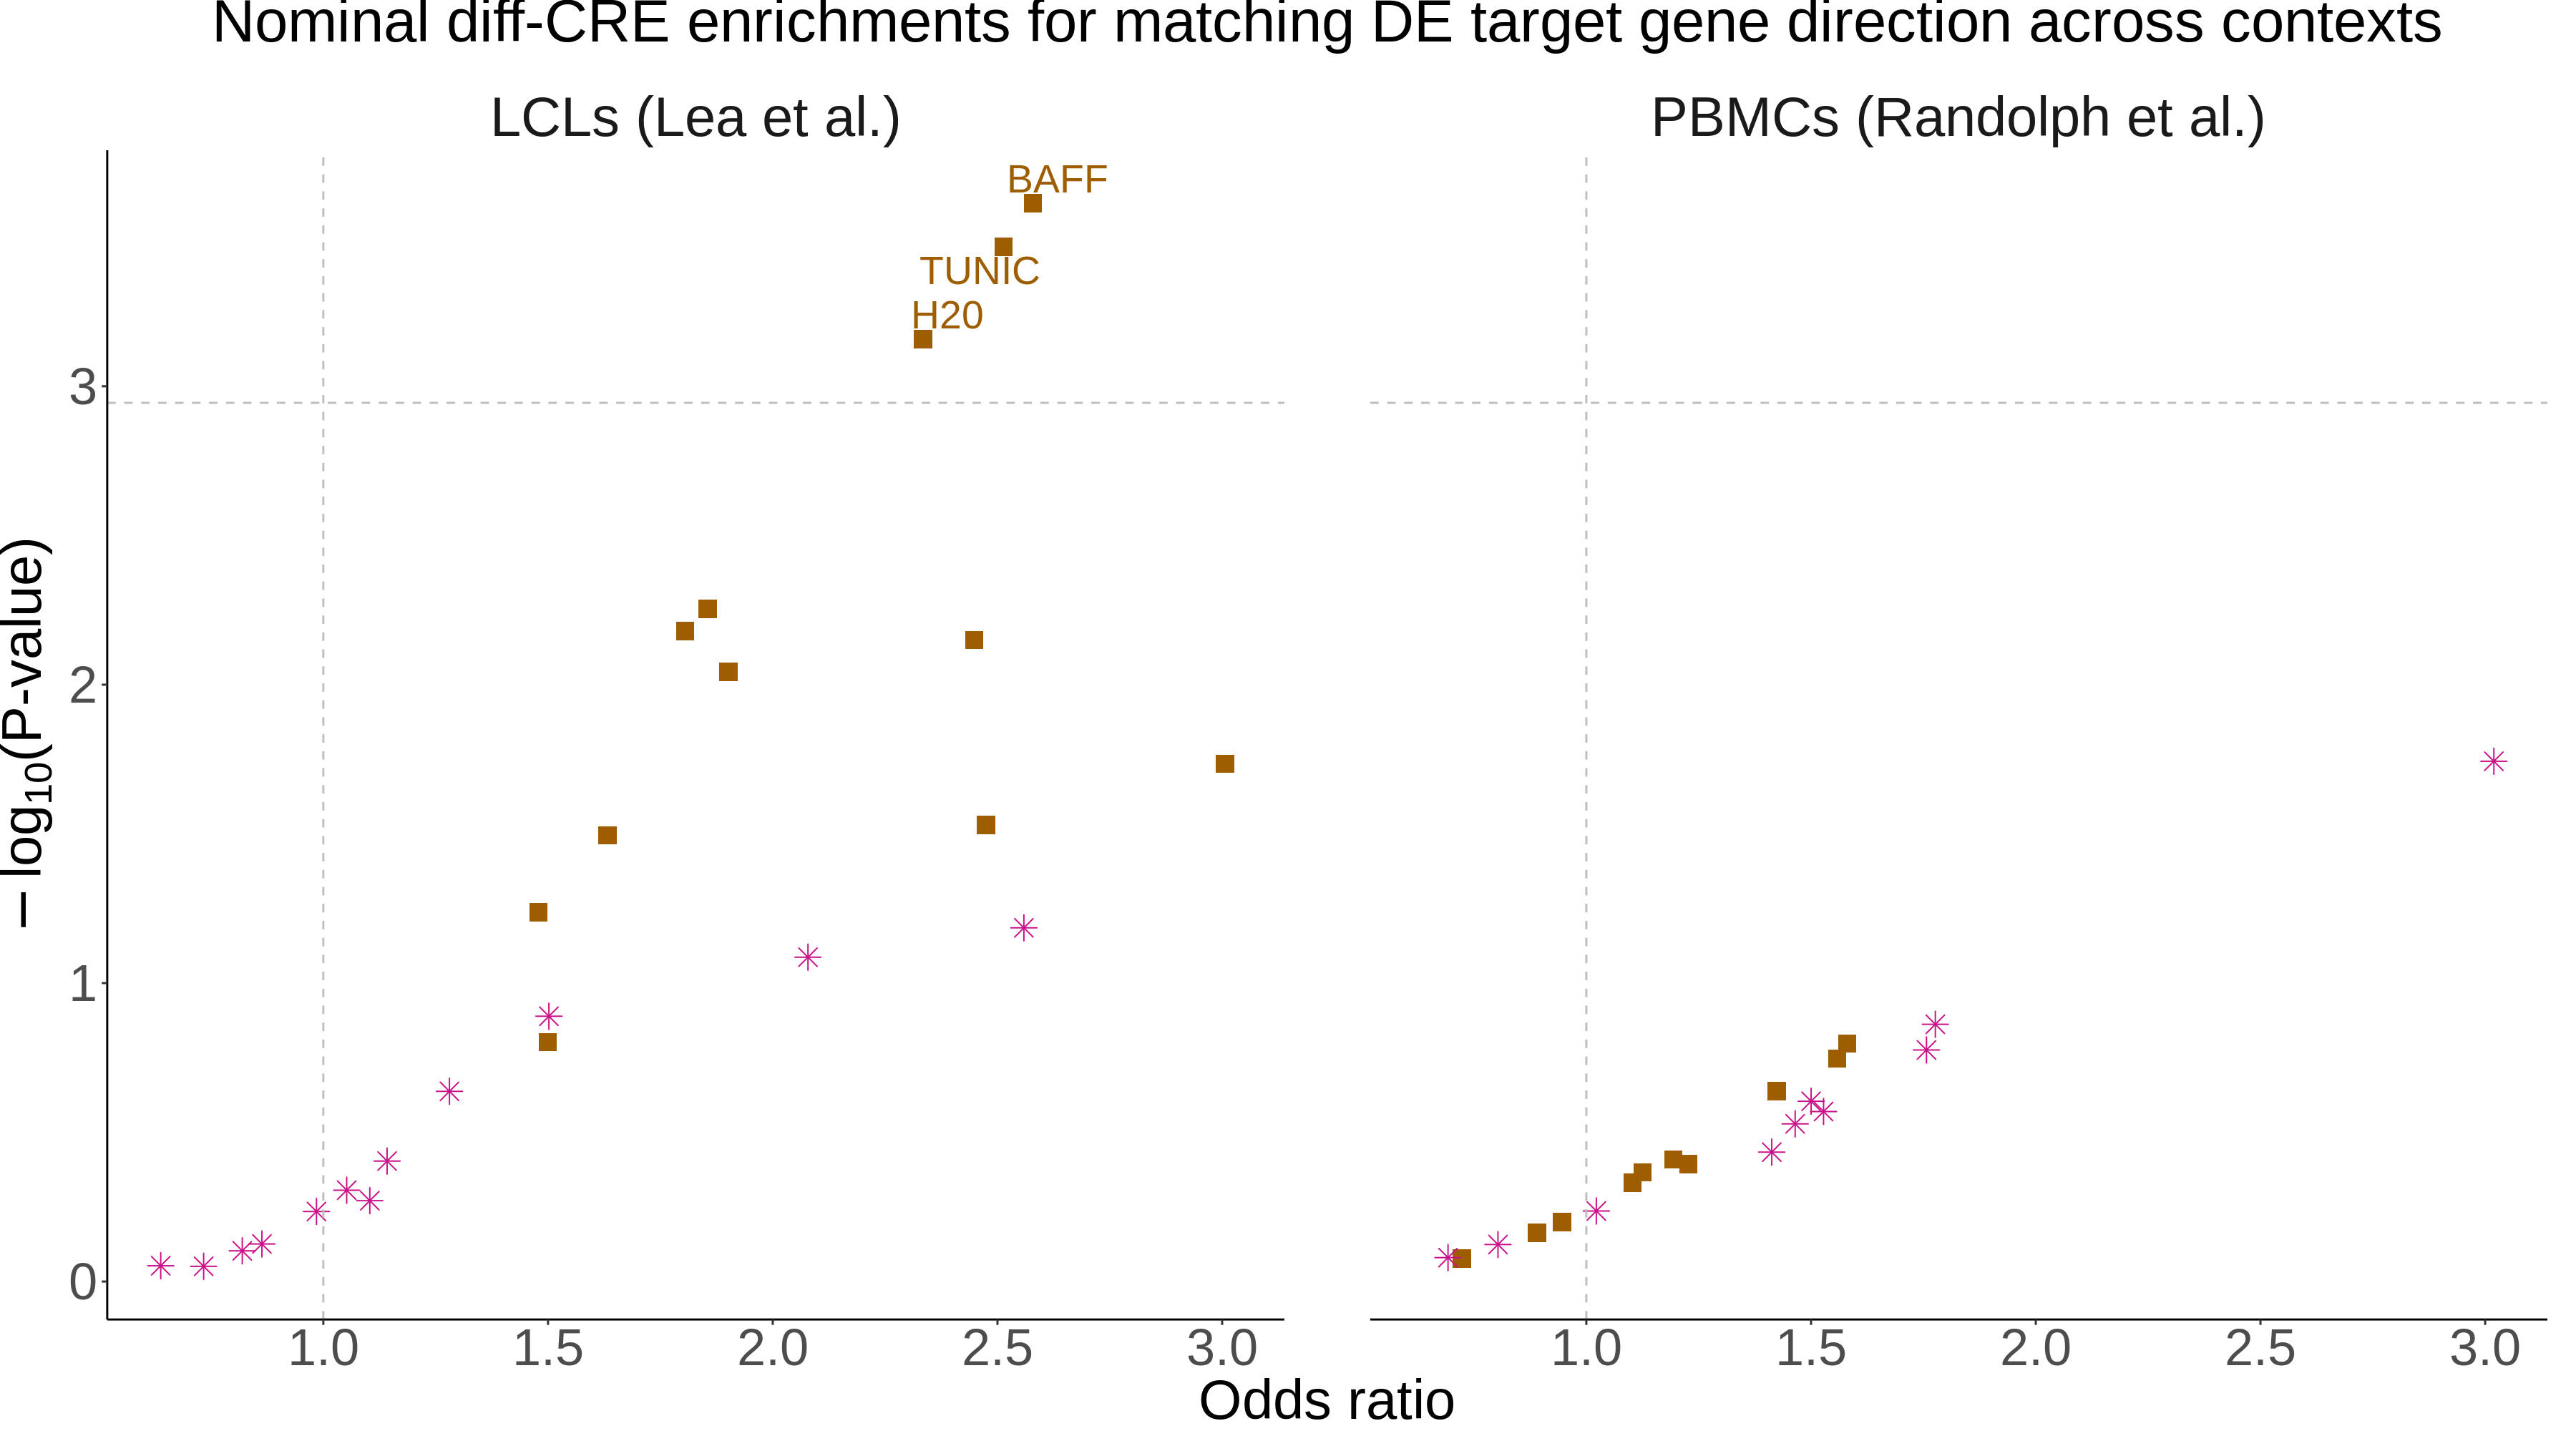

In [67]:
cdt_table <- tribble(
                    ~label,  ~condition, ~category, 
                    'GARD',  "Gardiquimod", 'Immune stimulant',        
                    'FSL1',  "Fibroblast-stimulating lipopeptide 1", 'Immune stimulant',        
                    'IFNG',  "Interferon gamma", 'Immune stimulant',        
                    'BAFF',  "B cell activating factor", 'Immune stimulant',        
                    'DEX',   "Dexamethasone", 'Hormone',                 
                    'IGF',   "Insulin-like growth factor 1", 'Hormone',                 
                    'ACRYL', "Acrylamide", 'Contaminant or stressor', 
                    'PFOA',  "Perfluorooctanoic acid", 'Contaminant or stressor', 
                    'BPA',   "Bisphenol A", 'Contaminant or stressor', 
                    'TUNIC', "Tunicamycin", 'Contaminant or stressor', 
                    'ETOH',  "Ethanol", 'Contaminant or stressor', 
                    'H20',   "Water", 'Control',         
                    'NI',    "Non-infected", 'Control',                 
                    'flu',   "IAV-infected", 'Immune stimulant'                
                ) %>% 
    mutate(celltype_facet = 'PBMCs (Randolph et al.)')

tbs <- lapply(split(cdt_table, cdt_table$celltype_facet), "[", -4)

cdt_legend <- tibble(x=0,
                     y=.9,
                     celltype_facet = levels(as.factor(cdt_table$celltype_facet)),
                     tb=tbs)

stcolors <- c(abccolor, hiccolor)

cferp <- ferp %>% 
           filter(score_type %in% c('ABC','HiC')) %>% 
           arrange(desc(pvalue)) %>% 
    mutate(padj = pvalue*n())

ggplot(cferp, 
       aes(x=odds_ratio, y=-log10(pvalue))) + 

            geom_point(aes(color=factor(score_type),shape=factor(score_type)), size=4, show.legend=FALSE) +
#             guides(color=guide_legend(title.position="top")) + 
            ggrepel::geom_text_repel(
                data=cferp %>% 
                    mutate(condition = as.character(condition),
                           points_label = if_else(celltype=='LCL', points_label, paste(points_label, condition, sep=' '))) %>% 
                    dplyr::filter(padj<0.05),
                aes(label=points_label, color=factor(score_type)),
                size=7,
                show.legend=FALSE,
                box.padding=.3
#                 hjust='left',
#                 direction="y",
#                 segment.alpha=0
            ) + 
            expand_limits(x=0.9) +
            geom_hline(yintercept=-log10(0.05/nrow(cferp)), color="gray", linetype='dashed') + 
            geom_vline(xintercept=1, color="gray", linetype='dashed') + 
#             geom_table_npc(data=cdt_legend, aes(npcx=x, npcy=y, label=tb), size=6.5) + 
            theme_classic() + 
            labs(x='Odds ratio',
                y=expression(-log[10]*"(P-value)"),
#                 color='Score type',
#                 shape='Score type'
                ) + 
            scale_color_manual(values=stcolors) + 
            scale_shape_manual(values=c(15, 8)) + 
            facet_wrap('celltype_facet', nrow=1, scales='fixed') + 
            theme(axis.text.x = element_text(size=textsize),
                  axis.text.y = element_text(size=textsize),
                  axis.title.x = element_text(size=titlesize),
                  axis.title.y = element_text(size=titlesize),
#                   legend.text = element_text(size=textsize),
#                   legend.title = element_text(size=titlesize),
#                   legend.position = c(.5,.2),
#     #               legend.box = 'vertical',
#     #               legend.spacing = unit(0.1, 'cm'),
#                   legend.background = element_rect(fill = "transparent"),
                  panel.background = element_rect(fill = "transparent",colour = NA),
                  panel.spacing = unit(3, 'line'),
                  strip.background = element_blank(),
                  strip.placement = "outside",
                  strip.text = element_text(size=titlesize))  + 
        ggtitle("Nominal diff-CRE enrichments for matching DE target gene direction across contexts") +
        theme(plot.title = element_text(size=30, hjust=.5, margin=margin(0,0,15,0)),
              plot.margin = unit(c(0,1,0,0),"line"))

ggsave(
    file.path(
        suppdir, 
        'ABC_HiC_DE_direction.png'
    ),
    width=18, 
    height=10
)